# Data Analysis Skill Test - 4Intelligence

*   Diego Rosa | 08/07/2020

## Case 2 - Comex

In [1]:
#import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#import data
comex_df = pd.read_csv('data_comexstat.csv', encoding='cp1252')
covariates_df = pd.read_excel('covariates.xlsx')

In [626]:
# Check comex_df.csv
comex_df.head()

,date,product,state,country,type,route,tons,usd,year
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997


In [4]:
#Check covariates.xlsx
covariates_df.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [5]:
##checking missing values
comex_df.isnull().sum()

date       0
product    0
state      0
country    0
type       0
route      0
tons       0
usd        0
dtype: int64

In [6]:
##checking missing values
covariates_df.isnull().sum()

year                  0
price_soybeans        1
price_corn            1
price_soybean_meal    1
gdp_china             0
gdp_iran              0
gpd_netherlands       1
gdp_spain             0
gdp_thailand          0
gdp_world             0
gdp_egypt             0
gdp_japan             0
gdp_vietnam           0
dtype: int64

All the missing values on the covariates dataframe could be spotted on the df's head. They are 1979 data - I'll deal with this later;

### 1) Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’;

In [7]:
# Check if there are no wrong entries on feature "type"
comex_df['type'].unique()

array(['Import', 'Export'], dtype=object)

In [8]:
# Check if there are no wrong entries on feature "product"
comex_df['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

In [9]:
# Check 'Date' feature type
type(comex_df['date'][0])

str

In [10]:
# Convert 'Date' into DateTime format
comex_df['date'] = pd.to_datetime(comex_df['date'], format="%Y-%m-%d")

# Create a new feature : year
comex_df['year'] =  pd.DatetimeIndex(comex_df['date']).year

In [11]:
'''
Create Dataframes per product (only exports)

soybeans : soybeans_exp_df
soybean oil : soybean_oil_exp_df
soybean meal : soybean_meal_exp_df

'''
soybeans_exp_df = comex_df[(comex_df['product'] == 'soybeans') & (comex_df['type'] == 'Export')]
soybean_oil_exp_df = comex_df[(comex_df['product'] == 'soybean_oil') & (comex_df['type'] == 'Export')]
soybean_meal_exp_df = comex_df[(comex_df['product'] == 'soybean_meal') & (comex_df['type'] == 'Export')]

In [12]:
def monthly_results(df):
    '''
    
    '''    
    monthly_tons = df.groupby('date')['tons'].sum()
    monthly_usd = df.groupby('date')['usd'].sum()
    return monthly_tons, monthly_usd

In [13]:
def year_results(df):
    '''
    
    '''    
    year_tons = df.groupby('year')['tons'].sum()
    year_usd = df.groupby('year')['usd'].sum()
    return year_tons, year_usd

*   Annual Results:

In [14]:
# Soybeans 
soybeans_y_tons, soybeans_y_usd = year_results(soybeans_exp_df)

# Soybean Oil
soybean_oil_y_tons, soybean_oil_y_usd = year_results(soybean_oil_exp_df)

# Soybean Meal
soybean_meal_y_tons, soybean_meal_y_usd = year_results(soybean_meal_exp_df)


*   Monthly Results

In [15]:
# Soybeans 
soybeans_m_tons, soybeans_m_usd = monthly_results(soybeans_exp_df)

# Soybean Oil
soybean_oil_m_tons, soybean_oil_m_usd = monthly_results(soybean_oil_exp_df)

# Soybean Meal
soybean_meal_m_tons, soybean_meal_m_usd = monthly_results(soybean_meal_exp_df)

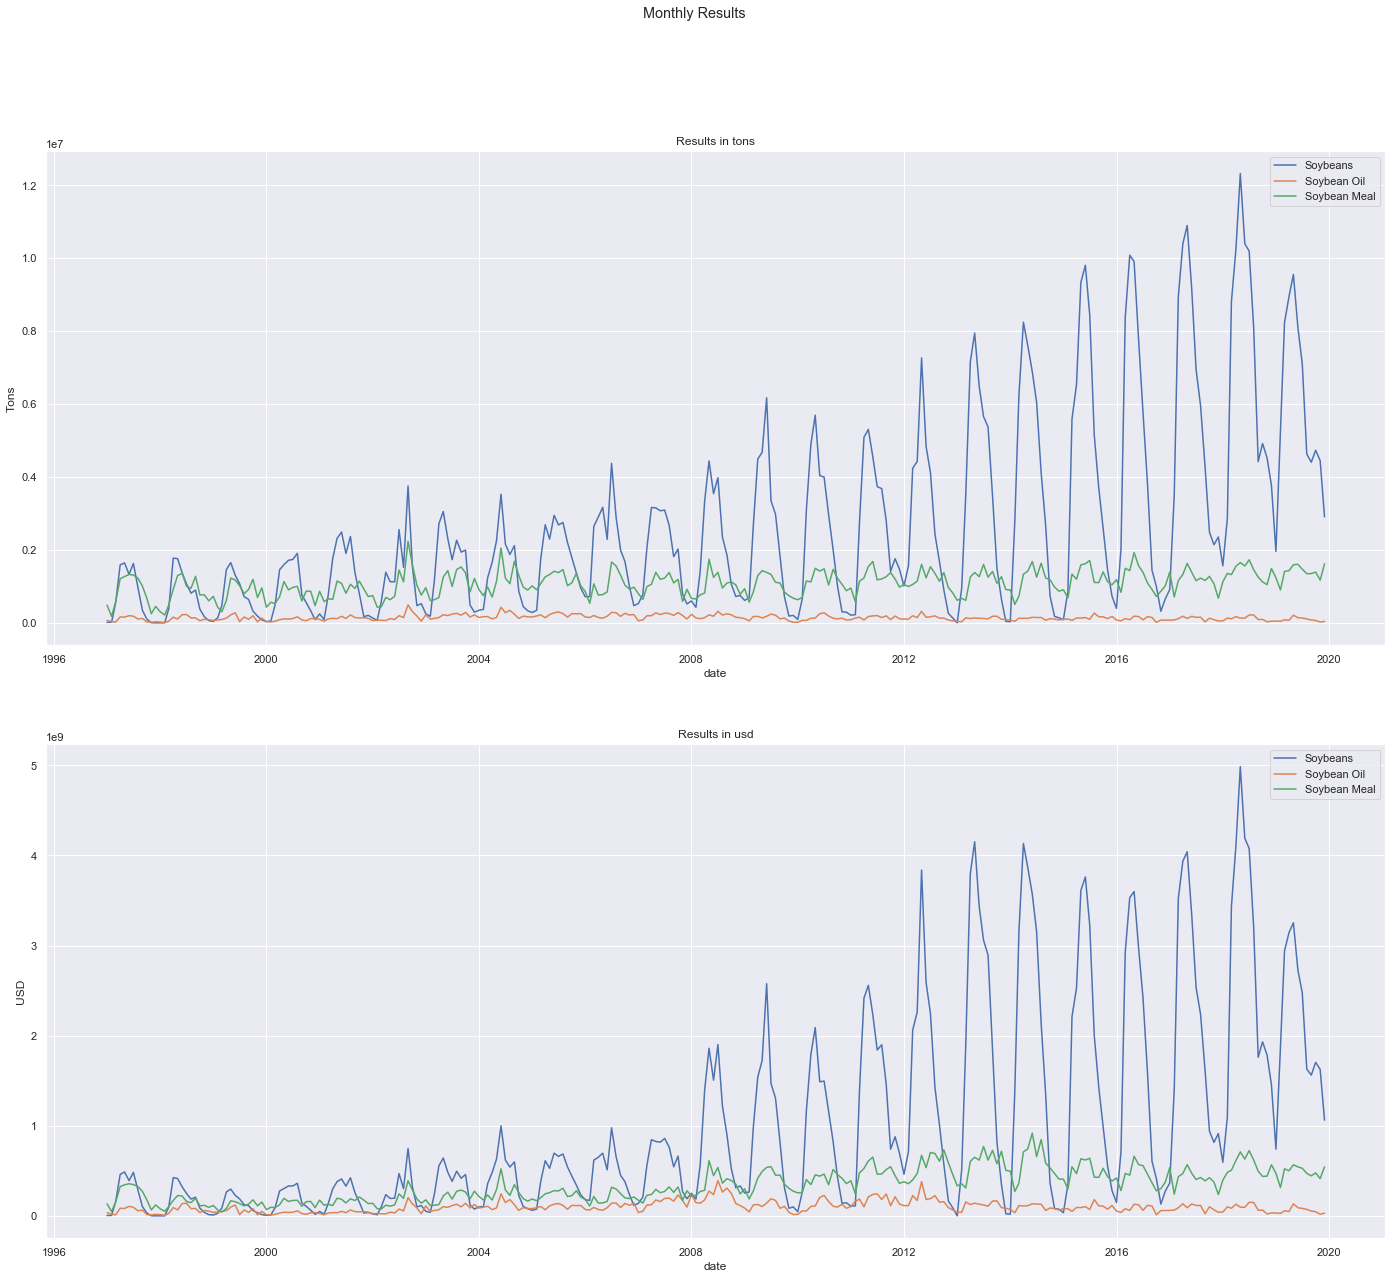

In [16]:
sns.set()
# Monthly Results

fig, (axis1, axis2) = plt.subplots(2,1, figsize = (24,20))

plt.suptitle('Monthly Results')
plt.sca(axis1)
plt.xlabel('Month')
plt.ylabel('Tons')
plt.title('Results in tons')
plt.sca(axis2)
plt.title('Results in usd')
plt.xlabel('Month')
plt.ylabel('USD')

sns.lineplot(x=soybeans_m_tons.index, y=soybeans_m_tons.values, ax=axis1, label='Soybeans')
sns.lineplot(x=soybeans_m_tons.index, y=soybean_oil_m_tons.values, ax=axis1, label='Soybean Oil')
sns.lineplot(x=soybeans_m_tons.index, y=soybean_meal_m_tons.values, ax=axis1, label='Soybean Meal')

sns.lineplot(x=soybeans_m_tons.index, y=soybeans_m_usd.values, ax=axis2, label='Soybeans')
sns.lineplot(x=soybeans_m_tons.index, y=soybean_oil_m_usd.values, ax=axis2, label='Soybean Oil')
sns.lineplot(x=soybeans_m_tons.index, y=soybean_meal_m_usd.values, ax=axis2, label='Soybean Meal')

plt.legend();

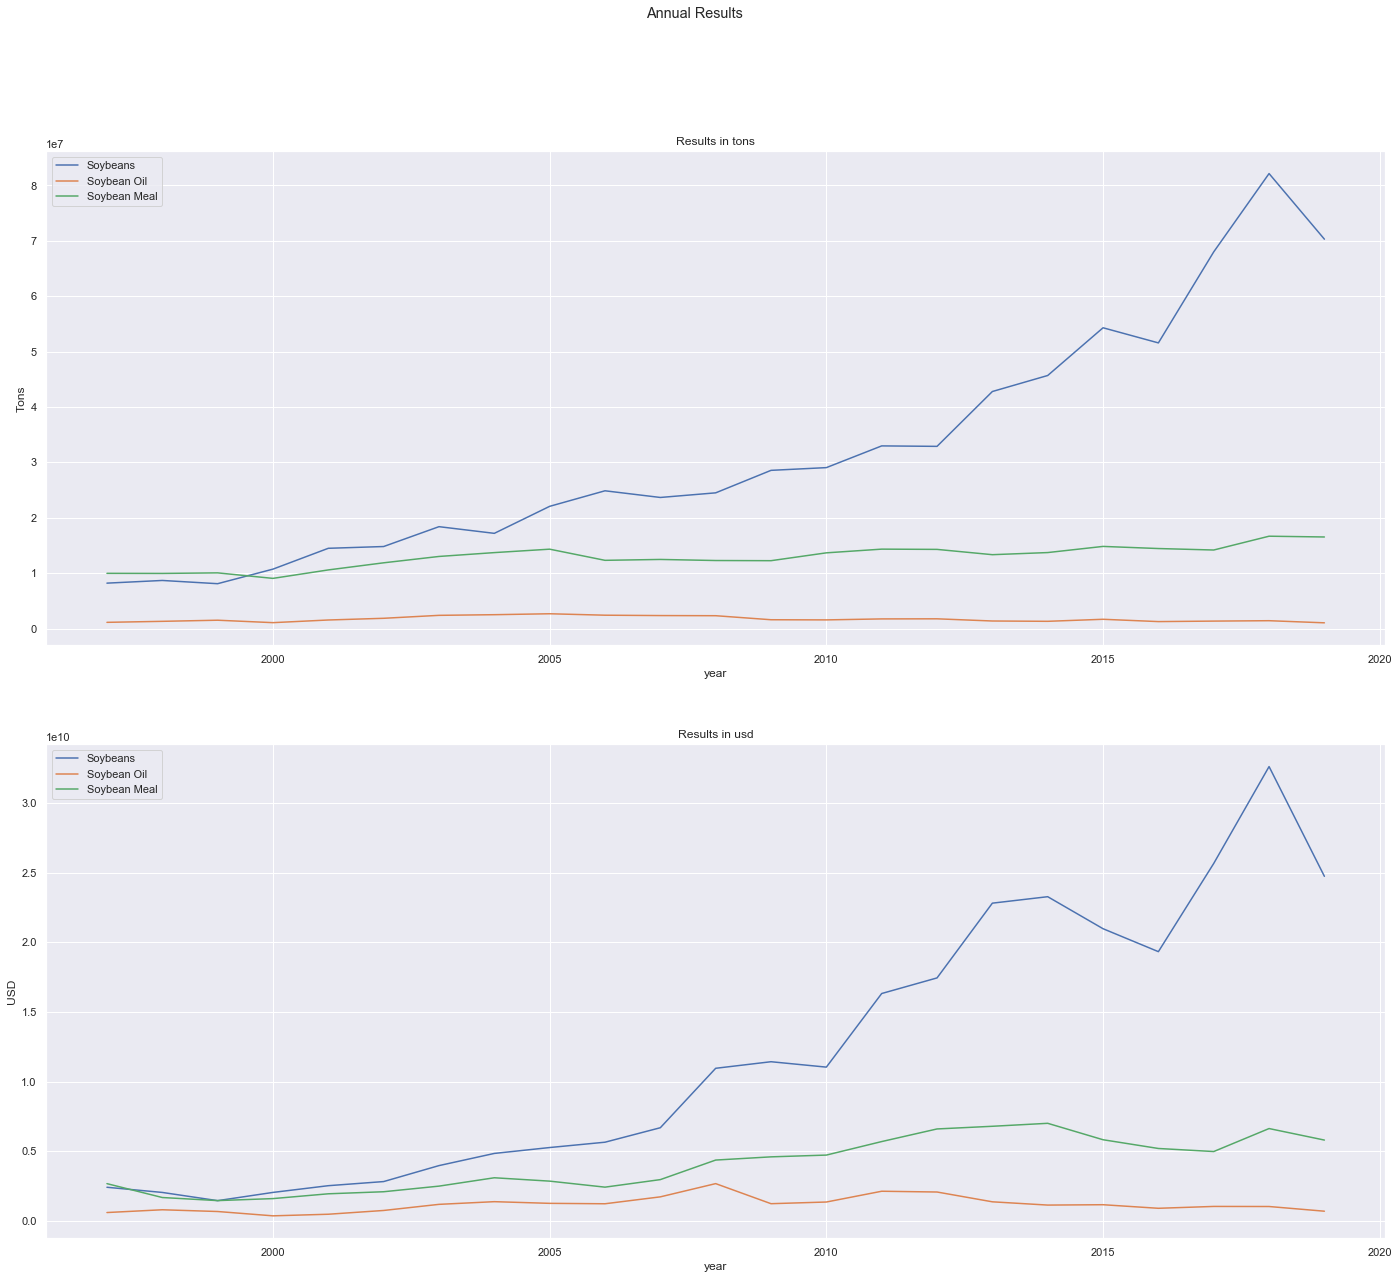

In [17]:
# Annual Results

fig, (axis1, axis2) = plt.subplots(2,1, figsize = (24,20))

plt.suptitle('Annual Results')
plt.sca(axis1)
plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Results in tons')
plt.sca(axis2)
plt.title('Results in usd')
plt.xlabel('Year')
plt.ylabel('USD')

sns.lineplot(x=soybeans_y_tons.index, y=soybeans_y_tons.values, ax=axis1, label='Soybeans')
sns.lineplot(x=soybeans_y_tons.index, y=soybean_oil_y_tons.values, ax=axis1, label='Soybean Oil')
sns.lineplot(x=soybeans_y_tons.index, y=soybean_meal_y_tons.values, ax=axis1, label='Soybean Meal')

sns.lineplot(x=soybeans_y_tons.index, y=soybeans_y_usd.values, ax=axis2, label='Soybeans')
sns.lineplot(x=soybeans_y_tons.index, y=soybean_oil_y_usd.values, ax=axis2, label='Soybean Oil')
sns.lineplot(x=soybeans_y_tons.index, y=soybean_meal_y_usd.values, ax=axis2, label='Soybean Meal')

plt.legend();

### 2) What are the 3 most important products exported by Brazil in the last 5 years?

In [535]:
def products_last5_years(df, year, metric):
    '''
    INPUT - dataframe (df), year to get sum of resuls (year), feature which will be summed up (metric)
    OUTPUT - pandas.core.series.Series - (Annual results in by product on the inputed metric)
    '''
    return df[df['year'] == year].groupby('product')[metric].sum()

In [536]:
# Last 5 Years - SUM of USD per product
perproduct_usd_results_2015 = products_last5_years(comex_df, 2015, 'usd')
perproduct_usd_results_2016 = products_last5_years(comex_df, 2016, 'usd')
perproduct_usd_results_2017 = products_last5_years(comex_df, 2017, 'usd')
perproduct_usd_results_2018 = products_last5_years(comex_df, 2018, 'usd')
perproduct_usd_results_2019 = products_last5_years(comex_df, 2019, 'usd')

# Last 5 Years - SUM of USD per product
perproduct_ton_results_2015 = products_last5_years(comex_df, 2015, 'tons')
perproduct_ton_results_2016 = products_last5_years(comex_df, 2016, 'tons')
perproduct_ton_results_2017 = products_last5_years(comex_df, 2017, 'tons')
perproduct_ton_results_2018 = products_last5_years(comex_df, 2018, 'tons')
perproduct_ton_results_2019 = products_last5_years(comex_df, 2019, 'tons')

In [537]:
def list_per_product(pos,l1,l2,l3,l4,l5):
    '''
    INPUTS: product index (pos), and lists of results per year (2015 to 2019) :l1 to l5
    
    OUTPUT: list of results per year for an specific product (results_product)
    
    '''
    results_product = []
    results_product.append(l1[pos])
    results_product.append(l2[pos])
    results_product.append(l3[pos])
    results_product.append(l4[pos])
    results_product.append(l5[pos])
    return results_product

In [538]:
'''
Rearrange USD results for a better visualization

'''

#corn
results_corn_usd = list_per_product(0,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)
#soybean meal
results_soybean_meal_usd = list_per_product(1,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)
#soybean oil
results_soybean_oil_usd = list_per_product(2,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)
#soybeans
results_soybeans_usd = list_per_product(3,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)
#sugar
results_sugar_usd = list_per_product(4,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)
#wheat
results_wheat_usd = list_per_product(5,perproduct_usd_results_2015,perproduct_usd_results_2016,perproduct_usd_results_2017,
                                    perproduct_usd_results_2018,perproduct_usd_results_2019)

In [539]:
'''
Rearrange ton results for a better visualization

'''

#corn
results_corn_ton = list_per_product(0,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)
#soybean meal
results_soybean_meal_ton = list_per_product(1,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)
#soybean oil
results_soybean_oil_ton = list_per_product(2,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)
#soybeans
results_soybeans_ton = list_per_product(3,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)
#sugar
results_sugar_ton = list_per_product(4,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)
#wheat
results_wheat_ton = list_per_product(5,perproduct_ton_results_2015,perproduct_ton_results_2016,perproduct_ton_results_2017,
                                    perproduct_ton_results_2018,perproduct_ton_results_2019)

In [540]:
def grouped_barplot(l1,l2,l3,l4,l5,l6,title,y_label):
    
    '''
    INPUT - Lists of results per product (l1 to l6), Plot's title and y_label
    
    OUTPUT - None
    
    This functions plots a grouped barplot - displaying the export results per product during the period 2015 - 2019
    
    '''

    #set barwodth
    barWidth = 0.1

    #set bar position on the x axis
    r1 = np.arange(len(l1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]

    #Build the figure
    plt.figure(figsize=(18,6))
    plt.title(title)
    plt.bar(r1, l1, width=barWidth, edgecolor='white', label='corn')
    plt.bar(r2, l2, width=barWidth, edgecolor='white', label='soybean meal')
    plt.bar(r3, l3, width=barWidth, edgecolor='white', label='soybean oil')
    plt.bar(r4, l4, width=barWidth, edgecolor='white', label='soybeans')
    plt.bar(r5, l5, width=barWidth, edgecolor='white', label='sugar')
    plt.bar(r6, l6, width=barWidth, edgecolor='white', label='wheat')


    # Add title and xticks
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.xticks([r + 5*(barWidth/2) for r in range(len(l1))],
               ['2015', '2016','2017','2018','2019'])

    # Put a legend below current axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    
    plt.show()

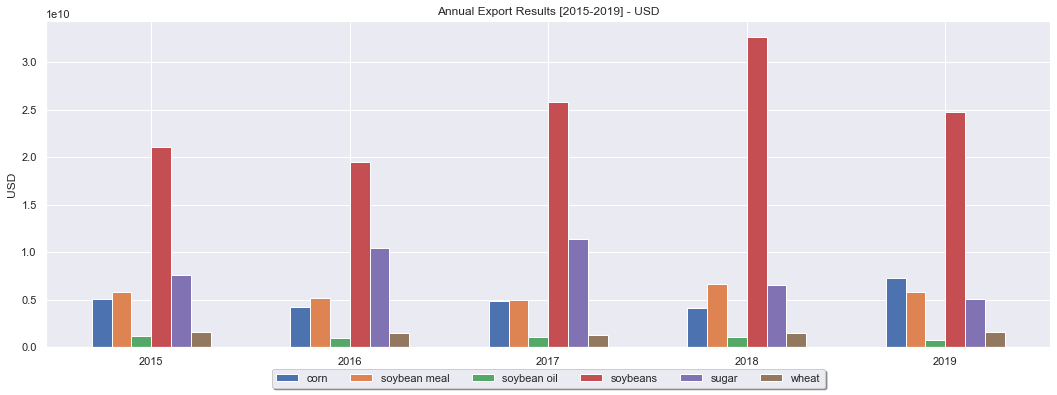

In [541]:
# Grouped barplot - USD
grouped_barplot(results_corn_usd,results_soybean_meal_usd,results_soybean_oil_usd,
                results_soybeans_usd,results_sugar_usd,results_wheat_usd,
                'Annual Export Results [2015-2019] - USD','USD')

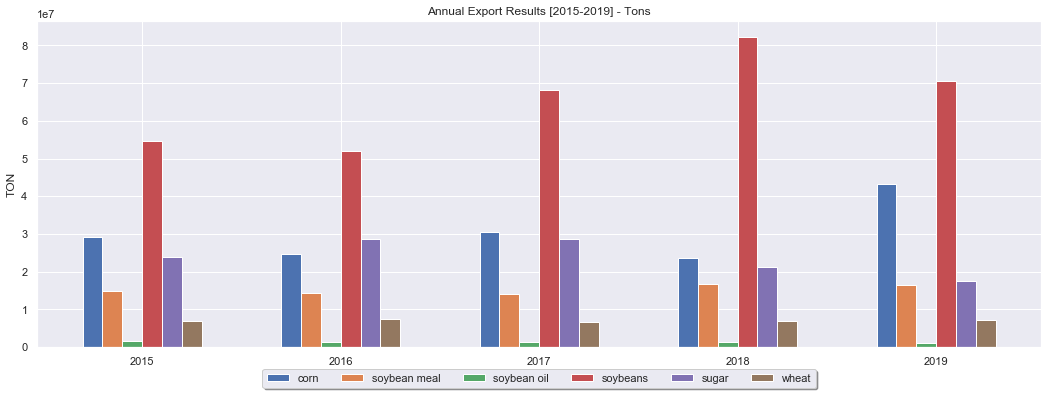

In [542]:
# Grouped barplot - Tons
grouped_barplot(results_corn_ton,results_soybean_meal_ton,results_soybean_oil_ton,
                results_soybeans_ton,results_sugar_ton,results_wheat_ton,
                'Annual Export Results [2015-2019] - Tons','TON')

In [543]:
def sum_results(l1):
    '''
    INPUT - List containing the lists of a product's result per year
    
    OUTPUT - Sum of the results on the last 5 years
    
    '''
    total = []
    for l in l1:
        total.append(np.sum(l))

        
    return total
    

In [544]:
# Get sum of export results - last 5 years - USD
total_usd = sum_results([results_corn_usd, results_soybean_meal_usd,
                         results_soybean_oil_usd, results_soybeans_usd,
                         results_sugar_usd, results_wheat_usd])

# Get sum of export results - last 5 years - Ton
total_ton = sum_results([results_corn_ton, results_soybean_meal_ton,
                         results_soybean_oil_ton, results_soybeans_ton,
                         results_sugar_ton, results_wheat_ton])

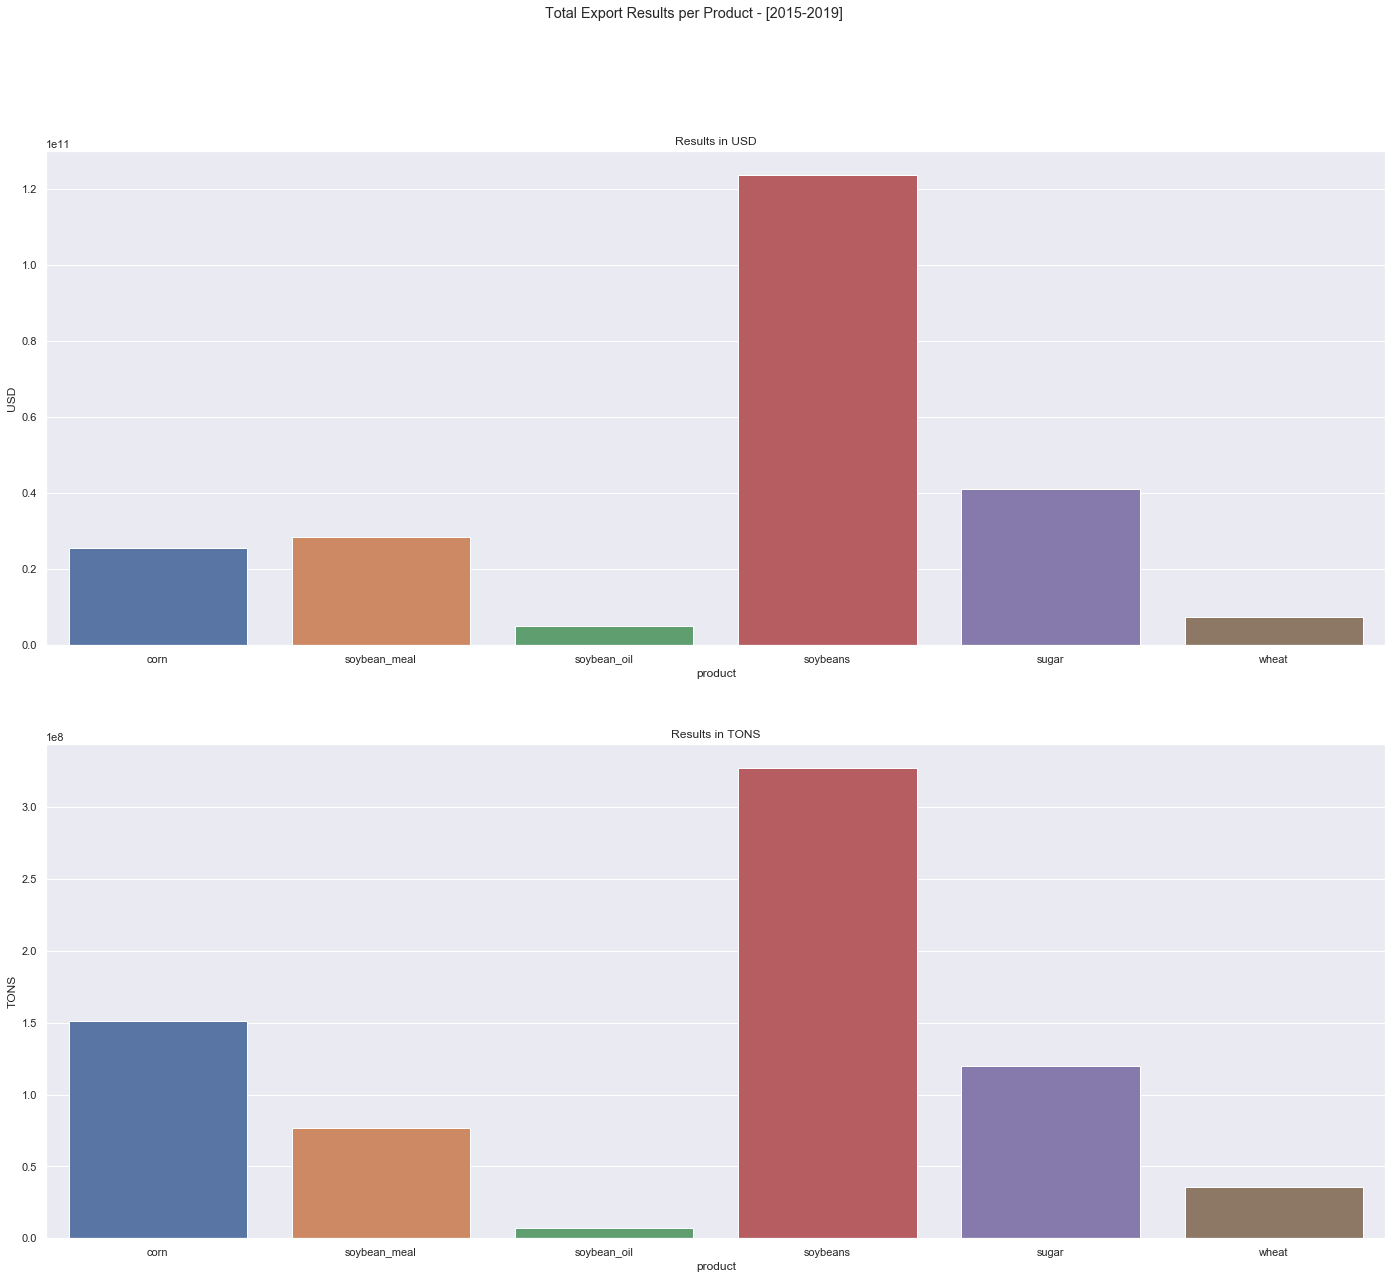

In [545]:
# Sum of Results on the last 5 years

fig, (axis1, axis2) = plt.subplots(2,1, figsize = (24,20))

plt.suptitle('Total Export Results per Product - [2015-2019]')
plt.sca(axis1)
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Results in USD')
plt.sca(axis2)
plt.title('Results in TONS')
plt.xlabel('Year')
plt.ylabel('TONS')

sns.barplot(x=perproduct_usd_results_2015.index, y=total_usd, ax=axis1);
sns.barplot(x=perproduct_usd_results_2015.index, y=total_ton, ax=axis2);

**What are the 3 most important products exported by Brazil in the last 5 years?**

In terms of total USD recieved with the exports:

*   By far, Soybeans is the most important product exported by Brazil in the last 5 years;
*   Followed by sugar, which has a significant decrease in the last 2 years and that might loose this spot for corn or soybean meal in the next years;
*   The third most important product during this period was soybean meal;

*   However, besides the lower export price, one can observe a positive trend on the quantity of exported corn, which already lead into a higher USD income compared to soybean meal and also sugar - hence, corn has a high probability of being among the most import products in the next years;

### 3) What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

In [191]:
# groupby corn exports by year and route on the last 10 years (tons)
corn_per_route = comex_df[(comex_df['product'] == 'corn') &
                          (comex_df['year'] >= 2010) &
                          (comex_df['type'] == 'Export')].groupby(['year','route'])['tons'].sum()
# total corn exported per years (tons)
corn_per_year = comex_df[(comex_df['product'] == 'corn') &
                         (comex_df['year'] >= 2010) &
                         (comex_df['type'] == 'Export')].groupby('year')['tons'].sum()

In [192]:
def get_result_per_route(pos, l1):
    '''
    INPUT - Route position on the original dataframe (pos)
    
    OUTPUT - List with the total amount of product exported per route in each year during the last 10 years (route_result)
    
    '''
    i = pos
    route_result = []
    while i < (len(corn_per_route)):
        route_result.append(l1[i])
        i += 5
    return route_result    
    

In [193]:
# Create Lists per Route
route_result_air = get_result_per_route(0,corn_per_route)
route_result_ground = get_result_per_route(1,corn_per_route)
route_result_other = get_result_per_route(2,corn_per_route)
route_result_river = get_result_per_route(3,corn_per_route)
route_result_sea = get_result_per_route(4,corn_per_route)

# Transform values into percentage exported per yeat

percent_route_result_air = (route_result_air/corn_per_year)*100
percent_route_result_ground = (route_result_ground/corn_per_year)*100
percent_route_result_other = (route_result_other/corn_per_year)*100
percent_route_result_river = (route_result_river/corn_per_year)*100
percent_route_result_sea = (route_result_sea/corn_per_year)*100

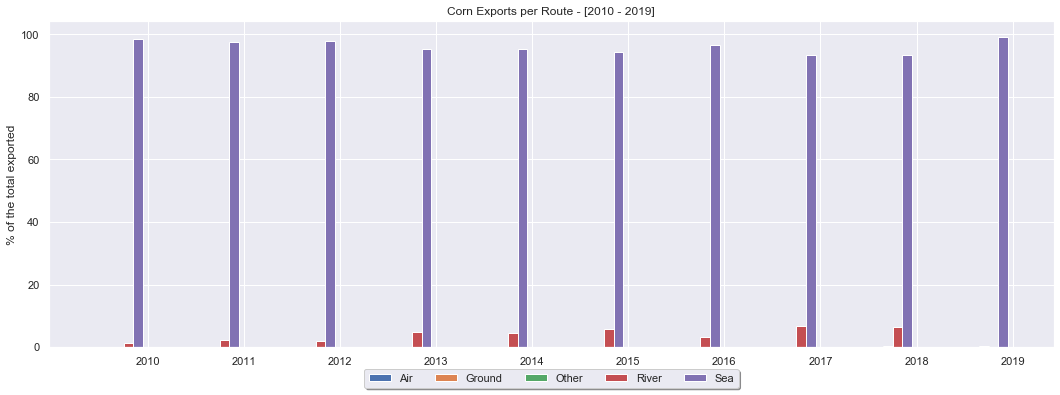

In [223]:
#set barwodth
barWidth = 0.1

#set bar position on the x axis
r1 = np.arange(len(percent_route_result_air))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#Build the figure
plt.figure(figsize=(18,6))
plt.title('Corn Exports per Route - [2010 - 2019]')
plt.bar(r1, percent_route_result_air, width=barWidth, edgecolor='white', label='Air')
plt.bar(r2, percent_route_result_ground, width=barWidth, edgecolor='white', label='Ground')
plt.bar(r3, percent_route_result_other, width=barWidth, edgecolor='white', label='Other')
plt.bar(r4, percent_route_result_river, width=barWidth, edgecolor='white', label='River')
plt.bar(r5, percent_route_result_sea, width=barWidth, edgecolor='white', label='Sea')

# Add title and xticks
plt.xlabel('Year')
plt.ylabel('% of the total exported')
plt.xticks([r + 10*(barWidth/2) for r in range(len(percent_route_result_air))],
           corn_per_year.index)

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()

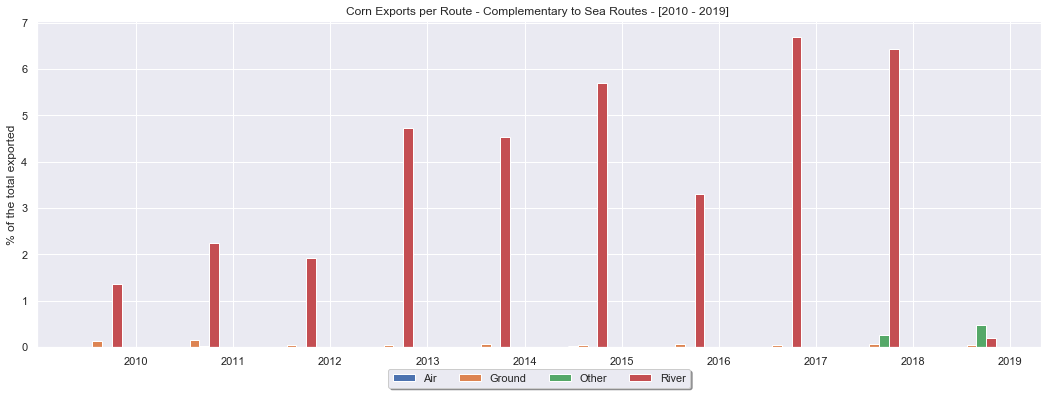

In [222]:
#set barwodth
barWidth = 0.1

#set bar position on the x axis
r1 = np.arange(len(percent_route_result_air))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

#Build the figure
plt.figure(figsize=(18,6))
plt.title('Corn Exports per Route - Complementary to Sea Routes - [2010 - 2019] ')
plt.bar(r1, percent_route_result_air, width=barWidth, edgecolor='white', label='Air')
plt.bar(r2, percent_route_result_ground, width=barWidth, edgecolor='white', label='Ground')
plt.bar(r3, percent_route_result_other, width=barWidth, edgecolor='white', label='Other')
plt.bar(r4, percent_route_result_river, width=barWidth, edgecolor='white', label='River')

# Add title and xticks
plt.xlabel('Year')
plt.ylabel('% of the total exported')
plt.xticks([r + 10*(barWidth/2) for r in range(len(percent_route_result_air))],
           corn_per_year.index)


# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)

plt.show()

**What are the main routes through which Brazil have been exporting ‘corn’ in the last few years?**

*   In the last 10 years, corn exportation were most completely done by sea routes (percentages are above 90% every year);
*   Besides sea routes, river transportation shows up as the most relevant export route for corn. It was possible to observe a positive trend in the percentage amount of corn being transported by river in this period, however there were a huge decrease in 2019 - that might be an outlier - further exploration and research would be necessary to understand this value;
*   Ground transportation seems to have lost relevance, while the "other" category showed up as a alternative on the last 2 years;


In [236]:
# Check if Sea Routes are as impactfull on other products as it is on corn export

def get_sea_export_percent(prod):
    '''
    INPUT: Product to check % of export done through sea routes (prod)
    
    OUTPUT : % of export done through sea routes on the last 10 years (percent_exported_sea)
    
    '''
    sea_export_per_product = comex_df[(comex_df['product'] == prod) &
                              (comex_df['year'] >= 2010) &
                              (comex_df['type'] == 'Export') &
                              (comex_df['route'] == 'Sea')].groupby('year')['tons'].sum()

    total_product_export = comex_df[(comex_df['product'] == prod) &
                                    (comex_df['year'] >= 2010) &
                                    (comex_df['type'] == 'Export')].groupby('year')['tons'].sum()

    percent_exported_sea = sea_export_per_product / total_product_export
    
    return percent_exported_sea


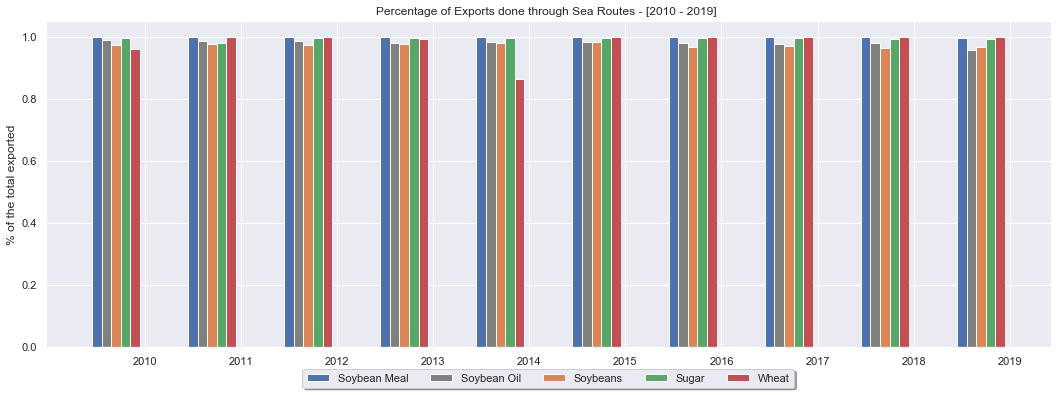

In [234]:
# % exported by sea per product
percent_exported_sea_soybean_meal =get_sea_export_percent('soybean_meal')
percent_exported_sea_soybean_oil =get_sea_export_percent('soybean_oil')
percent_exported_sea_soybeans =get_sea_export_percent('soybeans')
percent_exported_sea_sugar =get_sea_export_percent('sugar')
percent_exported_sea_wheat =get_sea_export_percent('wheat')

#set barwodth
barWidth = 0.1

#set bar position on the x axis
r1 = np.arange(len(percent_route_result_air))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#Build the figure
plt.figure(figsize=(18,6))
plt.title('Percentage of Exports done through Sea Routes - [2010 - 2019] ')
plt.bar(r1, percent_exported_sea_soybean_meal, width=barWidth, edgecolor='white', label='Soybean Meal')
plt.bar(r2, percent_exported_sea_soybean_oil, width=barWidth, edgecolor='white', color='gray', label='Soybean Oil')
plt.bar(r3, percent_exported_sea_soybeans, width=barWidth, edgecolor='white', label='Soybeans')
plt.bar(r4, percent_exported_sea_sugar, width=barWidth, edgecolor='white', label='Sugar')
plt.bar(r5, percent_exported_sea_wheat, width=barWidth, edgecolor='white', label='Wheat')


# Add title and xticks
plt.xlabel('Year')
plt.ylabel('% of the total exported')
plt.xticks([r + 10*(barWidth/2) for r in range(len(percent_exported_sea_soybean_meal))],
           percent_exported_sea_soybean_meal.index)

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.show()


**Are there differences in the relative importancem of routes depending on the product?**

*   Brazilian exports were mainly done through sea routes in the last 10 years. At least 90% of exports were shipped through the sea every year, for all the listed products in the dataset, excluding wheat exports in 2014, which sea routes represented 86.2 % of the total amount exported; 

### 4)Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

In [520]:
def trade_per_partner(prod):
    '''
    INPUT: Product to check the amount of a certain product (prod) Brazil have traded with other countries during
           the last 3 years [2017, 2018, 2019]
    
    OUTPUT: Pandas Series of Countries with the annual trade amount per country on the inputed product
                
    '''    
    export_per_country = comex_df[(comex_df['product'] == prod) &
                                  (comex_df['year'] >= 2017)].groupby(['year','country'])['usd'].sum()
        
    return export_per_country

In [521]:
def best_partners_per_year(list_best_partners):
    '''
    INPUT - Pandas Series of best partners in the last 3 years
    
    OUTPUT - List of tuples (Country,Amount Traded) per yeat (2017,2018,2019)    
    
    '''
    best_2017 = []
    best_2018 = []
    best_2019 = []
    
    
    # Split partners by year
    for i in range(len(list_best_partners)):
        if list_best_partners.index[i][0] == 2017:
            best_2017.append((list_best_partners.index[i][1],list_best_partners[i]))
        elif list_best_partners.index[i][0] == 2018:
            best_2018.append((list_best_partners.index[i][1],list_best_partners[i]))
        elif list_best_partners.index[i][0] == 2019:
            best_2019.append((list_best_partners.index[i][1],list_best_partners[i]))
        else:
            break
            
    # Sort partners | Keep only the top 5
    best_2017.sort(key=lambda x: x[1], reverse=True)
    best_2017 = best_2017[:5]
    best_2018.sort(key=lambda x: x[1], reverse=True)
    best_2018 = best_2018[:5]
    best_2019.sort(key=lambda x: x[1], reverse=True)  
    best_2019 = best_2019[:5]    
    
        
    return best_2017, best_2018, best_2019

In [522]:
def get_import_export(l1, year, prod):
    '''
    INPUT: List of the five best trade partners (l1) in the inputed year (year) on a specific product (prod)
    
    OUTPUT: List of total amount imported (import_amount_list) and exported (export_amount_list)
            for the best trade partners inputed, listed by country in the order shown on (countries)
    
    '''    
    #Create empty lists to store information
    import_amount_list = []
    export_amount_list = []
    #Get list of the five best trade partners at the respective year
    countries = [i[0] for i in l1[:5]]
    # Interect through list of best trade partners to get import/export information
    for country in countries:
        import_amount = comex_df[(comex_df['product'] == prod) &
                                 (comex_df['year'] == year) &
                                 (comex_df['country'] == country) &
                                 (comex_df['type'] == 'Import')].groupby('year')['usd'].sum()
        export_amount = comex_df[(comex_df['product'] == prod) &
                                 (comex_df['year'] == year) &
                                 (comex_df['country'] == country) &
                                 (comex_df['type'] == 'Export')].groupby('year')['usd'].sum()
        
        
        # If null, append 0
        if len(import_amount) == 0:
            import_amount_list.append(0)
        else:
            import_amount_list.append(import_amount.values[0])
        # If null, append 0
        if len(export_amount) == 0:
            export_amount_list.append(0)
        else:          
            export_amount_list.append(export_amount.values[0])
            
    return import_amount_list, export_amount_list, countries

In [523]:
def plot_best_partners(l1, i1, e1,c1, year, prod):
    '''
    INPUT: Lists of total traded, total imported, total exported (l1,i1,e1) for the best 5 trade parteners (c1)
           of a specific product (prod) on the inputed year (year)
    
    OUTPUT: None
    
    This function plots a grouped bargraph comparing the best trade partners in terms of import / export / total traded
    
    '''

    #set barwodth
    barWidth = 0.1

    #set bar position on the x axis
    r1 = np.arange(len(l1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]


    #Build the figure
    plt.figure(figsize=(18,6))
    plt.title('Brazilian Best {} Trade Partners - {}'.format(prod,year))
    plt.bar(r1,[i[1] for i in l1] , width=barWidth, edgecolor='white', label='Total')
    plt.bar(r2, e1, width=barWidth, edgecolor='white', color='gray', label='Export')
    plt.bar(r3, i1, width=barWidth, edgecolor='white', label='Import')

    # Add title and xticks
    plt.xlabel('Country')
    plt.ylabel('USD')
    plt.xticks([r + (barWidth) for r in range(len(i1))],c1)

    # Put a legend below current axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)

    plt.show()

In [524]:
def get_total_trade(c1,c2,c3,prod):
    '''
    INPUTS: Lists of the best trade partners per year (c1-2017, c2-2018, c3-2019) on the respective product (prod)
    
    OUTPUT: List of tuples (country, total amount traded) ordered from higher to lower
    
    '''
    total_trade_country = []
    for country in set(c1+c2+c3):
        total_traded = comex_df[(comex_df['product'] == prod) &
                 (comex_df['year'] >= 2017) &
                 (comex_df['country'] == country)].groupby('year')['usd'].sum()
        total_trade_country.append((country,total_traded.sum()))
        
    #order from higher to lower value traded
    total_trade_country.sort(key=lambda x: x[1], reverse=True)

    return total_trade_country               


In [553]:
def plot_cum_best_traders(l1,prod):
    '''
    INPUT: list of tuples (country, cummulative amount traded) for the best trade partners (l1) on the inputed product (prod)
    
    OUTPUT: None
    
    This function plots a bargraph with the cummulative amount traded (USD) per each country in the last three years [2017-2019]
    '''
    plt.figure(figsize=(18,6))
    plt.title('Best Trade Partners in the Last 3 years - Cummulative Amount Traded - {}'.format(prod));
    sns.barplot(x=[i[0] for i in l1], y=[i[1] for i in l1], palette="GnBu_d");
    plt.xlabel('Countries')
    plt.ylabel('Total traded USD')

*   **Corn**

In [526]:
# Corn
corn_export_per_country = trade_per_partner('corn')
corn_best_2017, corn_best_2018, corn_best_2019 = best_partners_per_year(corn_export_per_country)
#Import | Export
corn_import_2017, corn_export_2017, countries_2017 = get_import_export(corn_best_2017, 2017, 'corn')
corn_import_2018, corn_export_2018, countries_2018 = get_import_export(corn_best_2018, 2018, 'corn')
corn_import_2019, corn_export_2019, countries_2019 = get_import_export(corn_best_2019, 2019, 'corn')


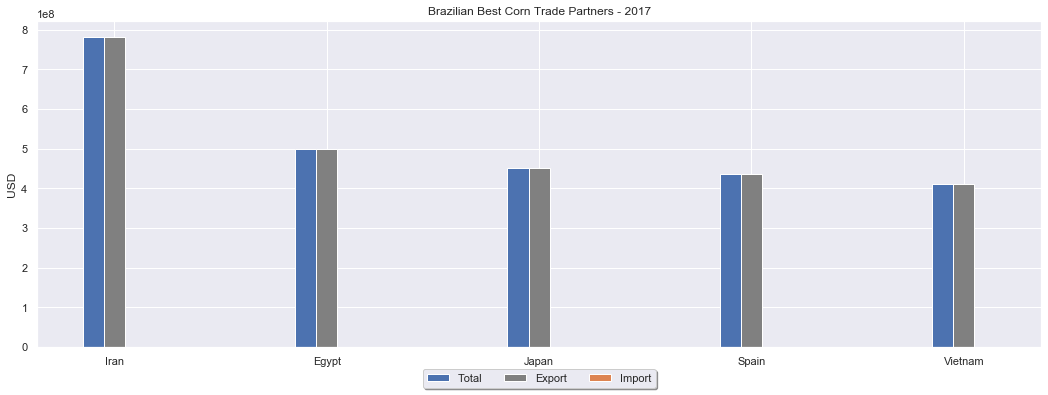

In [527]:
#Plot - Corn Best Partners 2017
plot_best_partners(corn_best_2017,corn_import_2017,corn_export_2017,countries_2017,2017,'Corn')

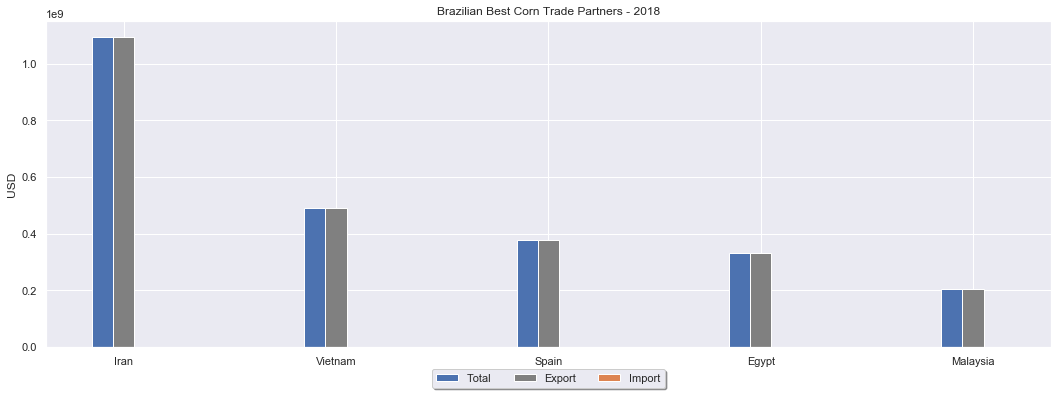

In [528]:
#Plot - Corn Best Partners 2018
plot_best_partners(corn_best_2018,corn_import_2018,corn_export_2018,countries_2018,2018,'Corn')

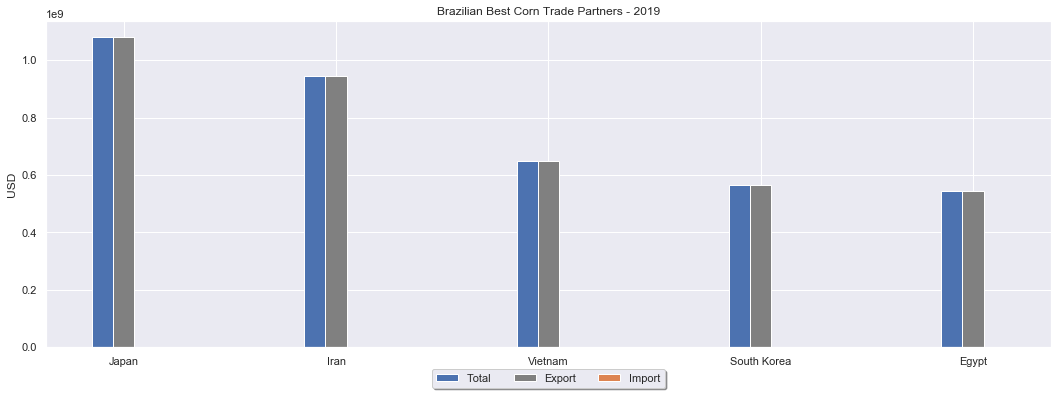

In [529]:
#Plot - Corn Best Partners 2019
plot_best_partners(corn_best_2019,corn_import_2019,corn_export_2019,countries_2019,2019,'Corn')

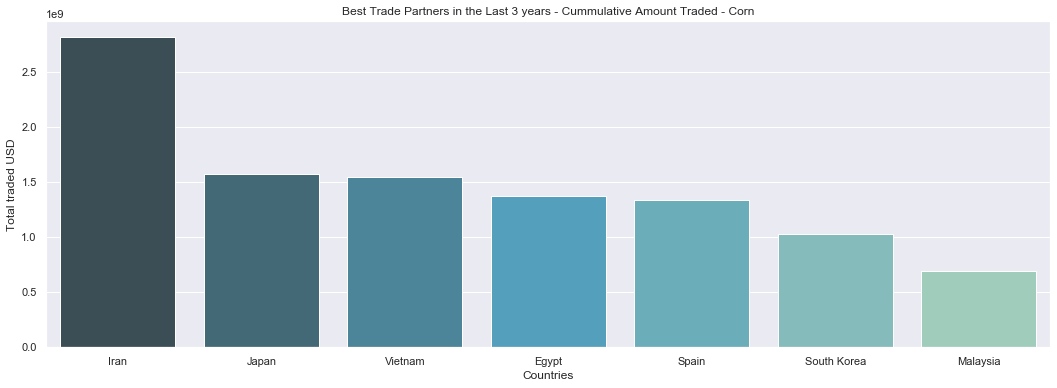

In [558]:
total_traded_corn = get_total_trade(countries_2017,countries_2018,countries_2019,'corn')
plot_cum_best_traders(total_traded_corn,'Corn')

*   **Sugar**

In [546]:
# Sugar
sugar_export_per_country = trade_per_partner('sugar')
sugar_best_2017, sugar_best_2018, sugar_best_2019 = best_partners_per_year(sugar_export_per_country)
#Import | Export
sugar_import_2017, sugar_export_2017, sugar_countries_2017 = get_import_export(sugar_best_2017, 2017, 'sugar')
sugar_import_2018, sugar_export_2018, sugar_countries_2018 = get_import_export(sugar_best_2018, 2018, 'sugar')
sugar_import_2019, sugar_export_2019, sugar_countries_2019 = get_import_export(sugar_best_2019, 2019, 'sugar')

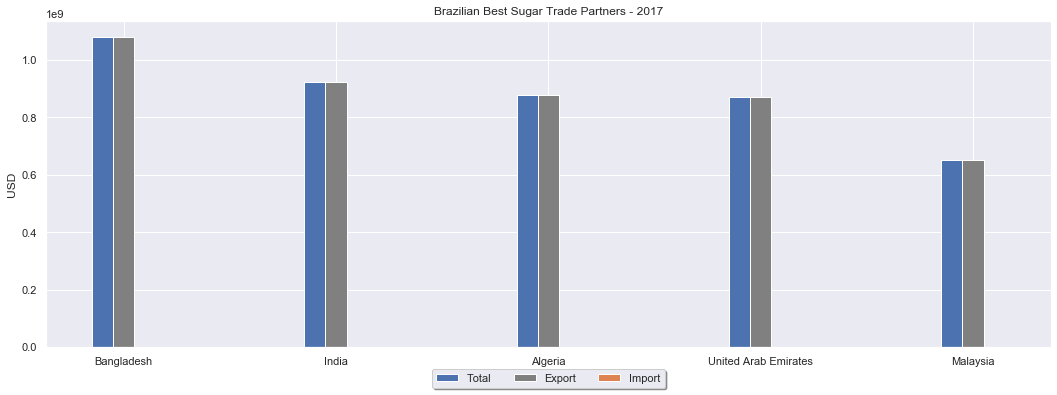

In [547]:
#Plot - Sugar Best Partners 2017
plot_best_partners(sugar_best_2017,sugar_import_2017,sugar_export_2017,sugar_countries_2017,2017,'Sugar')

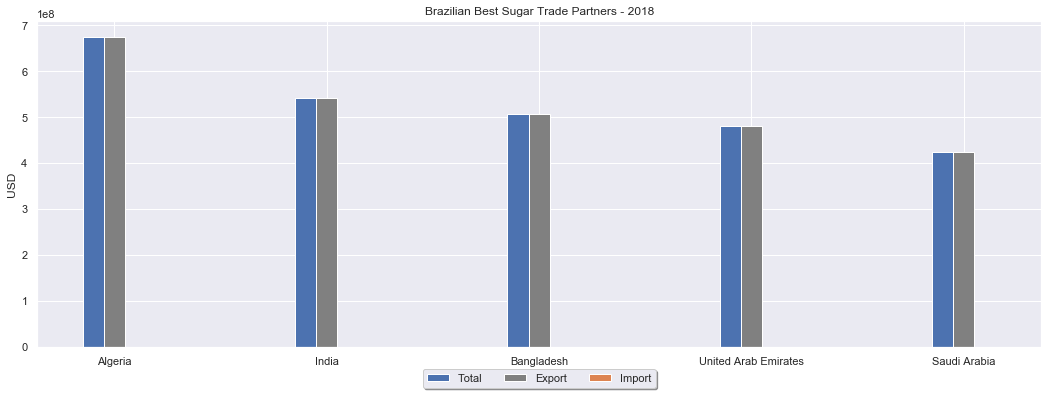

In [548]:
#Plot - Sugar Best Partners 2018
plot_best_partners(sugar_best_2018,sugar_import_2018,sugar_export_2018,sugar_countries_2018,2018,'Sugar')

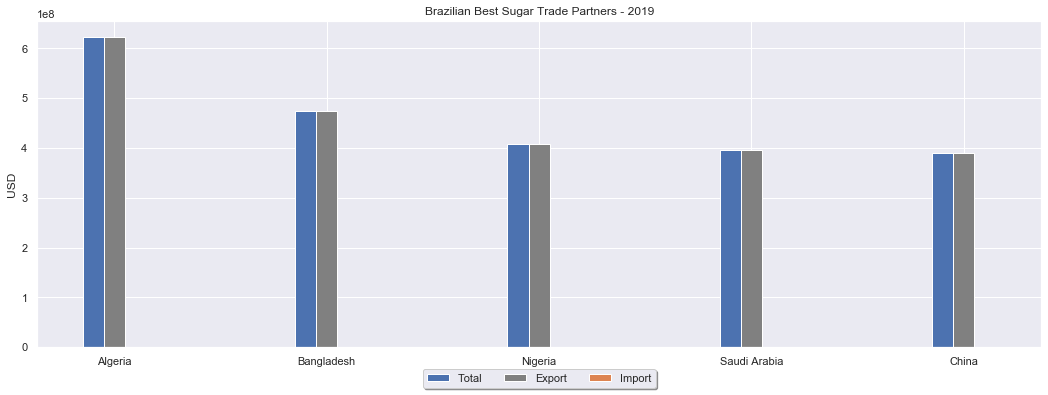

In [549]:
#Plot - Sugar Best Partners 2019
plot_best_partners(sugar_best_2019,sugar_import_2019,sugar_export_2019,sugar_countries_2019,2019,'Sugar')

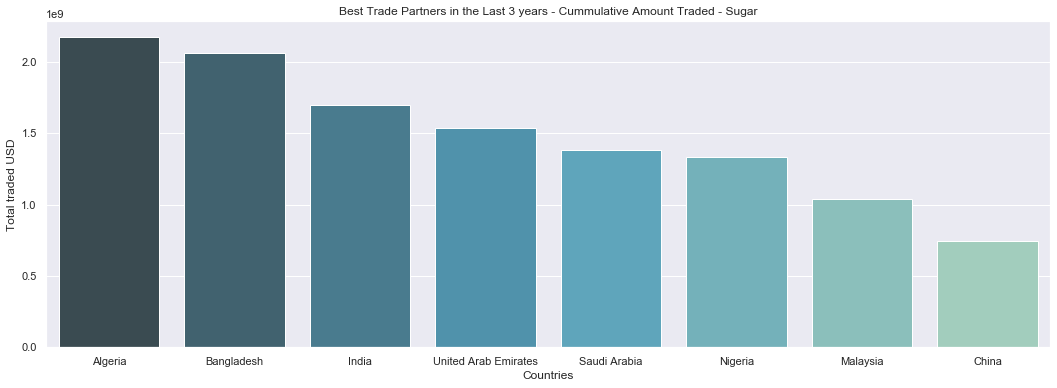

In [557]:
total_traded_sugar = get_total_trade(sugar_countries_2017,sugar_countries_2018,sugar_countries_2019,'sugar')
plot_cum_best_traders(total_traded_sugar,'Sugar')

**Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?**

For both corn and sugar, the Brazilian relation with the most important trade partners in the last 3 years is almost completely as a exporter (import quantities in USD are irrelevant - as shown on the graphs above).

*   **Corn**: The most important trade partners in the period in question are: Iran, Japan, Vietnam, Egypt and Spain;
*   **Sugar**: The most important trade partners in the period in question are: Algeria, Bangladesh, India, United Arab Emirates, Saudi Arabia;


### 5) For each of the products in the dataset, show the 5 most important states in terms of exports?

In [942]:
def most_imp_state_per_product(prod):
    '''
    INPUT - product to have the information querried from the original data frame (prod)
    
    OUTPUT - (state_prod_year) - Pandas grouped object cointaining quantity (tons) exported by state,
             listed by year;
    
             (state_prod) - % amount of product exported (tons), listed by state ;
    
    '''
    state_prod_year = comex_df[(comex_df['product'] == prod) &
             (comex_df['type'] == 'Export')].groupby(['year','state'])['tons'].sum()
    
    state_prod = comex_df[(comex_df['product'] == prod) &
             (comex_df['type'] == 'Export')].groupby('state')['tons'].sum()
    
    total_exported_prod = comex_df[(comex_df['product'] == prod) &
             (comex_df['type'] == 'Export')]['tons'].sum()
    
    # Percentage value (referent to the total product ever exported by Brazil)
    state_prod = (state_prod/total_exported_prod)*100
    
    # Sort from higher to lower, and get the top 5
    state_prod.sort_values(ascending=False, inplace=True)
    state_prod = state_prod[:5]    
    
    return state_prod_year, state_prod[:5]

In [943]:
def state_export_by_year(l1, states_list):
    '''
    INPUT - (l1) Pandas grouped object cointaining quantity (tons) exported by state,
             listed by year;
            (states_list) List of the top 5 exporter states;
    
    OUTPUT - (full_list) - List containing lists of triples (year, state, quantity exported [tons]) for each
             of the brazilian states
    
    '''
    full_list = []
    for state in states_list:
        minor_list = []
        #print(state)
        for i in range(len(l1)):
            if l1.index[i][1] == state:
                minor_list.append((l1.index[i][0],l1.index[i][1],l1[i]))
                #print((l1.index[i][0],l1.index[i][1],l1[i]))
        if len(minor_list) > 0:        
            full_list.append(minor_list)
    return full_list     
        
        

In [944]:
def plot_total_export_state(s1, prod):
    '''
    
    INPUT - (s1) List of % quantity of product exported by state
            (prod) Product
            
    OUTPUT - None
    
    This functions plots a bargraph containing the total amount in % exported by each of the brazilian states    
    '''
    sns.set()
    plt.figure(figsize=(18,6))
    sns.barplot(x=s1.index, y=s1.values, palette='GnBu_d');
    plt.title('Historical amount of {} exported by state [%]'.format(prod))
    plt.xlabel('state')
    plt.ylabel('% exported')

In [945]:
def plot_export_state_over_time(state_prod_year, prod):
    
    '''
    INPUT - (state_prod_year) - List containing lists of triples (year, state, quantity exported [tons]) for each
             of the brazilian states
    
    OUTPUT- None
    
    This function plots one line for each of the brazilian states on the same axis, illustrating the amoung of tons
    exported by that state each year    
    
    '''
    sns.set_context("poster")
    plt.figure(figsize=(30,15))
    for i in range(len(state_prod_year)):
        leg = state_prod_year[i][0][1]
        year = []
        value = []    
        for j in range(len(state_prod_year[i])):
            year.append(state_prod_year[i][j][0])
            value.append(state_prod_year[i][j][2])
        sns.lineplot(x=year, y=value, label=leg);

    # Put a legend below current axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=8);
    # Plot title
    plt.title('{} Export per state over time [tons]'.format(prod));
    plt.ylabel('Tons Exported');

In [946]:
# Querying product data from original dataset
state_prod_corn, perc_state_prod_corn = most_imp_state_per_product('corn')
state_prod_soybean_meal, perc_state_prod_soybean_meal = most_imp_state_per_product('soybean_meal')
state_prod_soybean_oil, perc_state_prod_soybean_oil = most_imp_state_per_product('soybean_oil')
state_prod_soybeans, perc_state_prod_soybeans = most_imp_state_per_product('soybeans')
state_prod_sugar, perc_state_prod_sugar = most_imp_state_per_product('sugar')
state_prod_wheat, perc_state_prod_wheat = most_imp_state_per_product('wheat')

# Decompose Pandas objects into triples for annual export plots
state_prod_year_corn = state_export_by_year(state_prod_corn, list(perc_state_prod_corn.index))
state_prod_year_soybean_meal = state_export_by_year(state_prod_soybean_meal, list(perc_state_prod_soybean_meal.index))
state_prod_year_soybean_oil = state_export_by_year(state_prod_soybean_oil, list(perc_state_prod_soybean_oil.index))
state_prod_year_soybeans = state_export_by_year(state_prod_soybeans, list(perc_state_prod_soybeans.index))
state_prod_year_sugar = state_export_by_year(state_prod_sugar, list(perc_state_prod_sugar.index))
state_prod_year_wheat = state_export_by_year(state_prod_wheat, list(perc_state_prod_wheat.index))


*   **CORN**


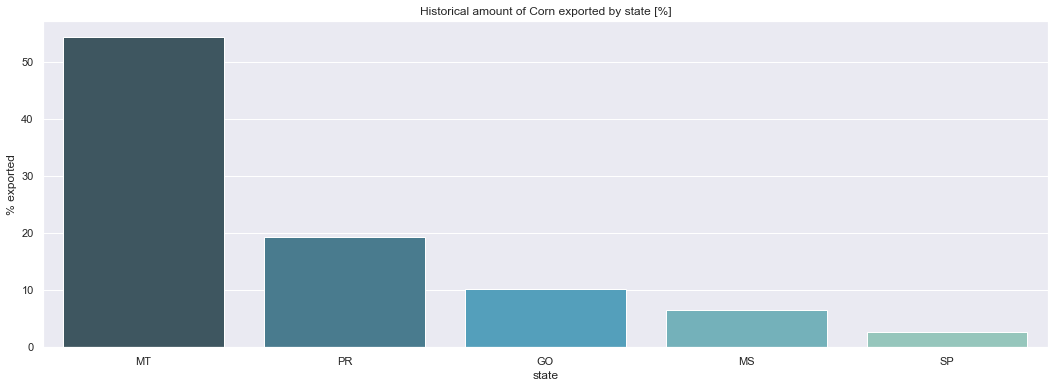

In [947]:
plot_total_export_state(perc_state_prod_corn, 'Corn')

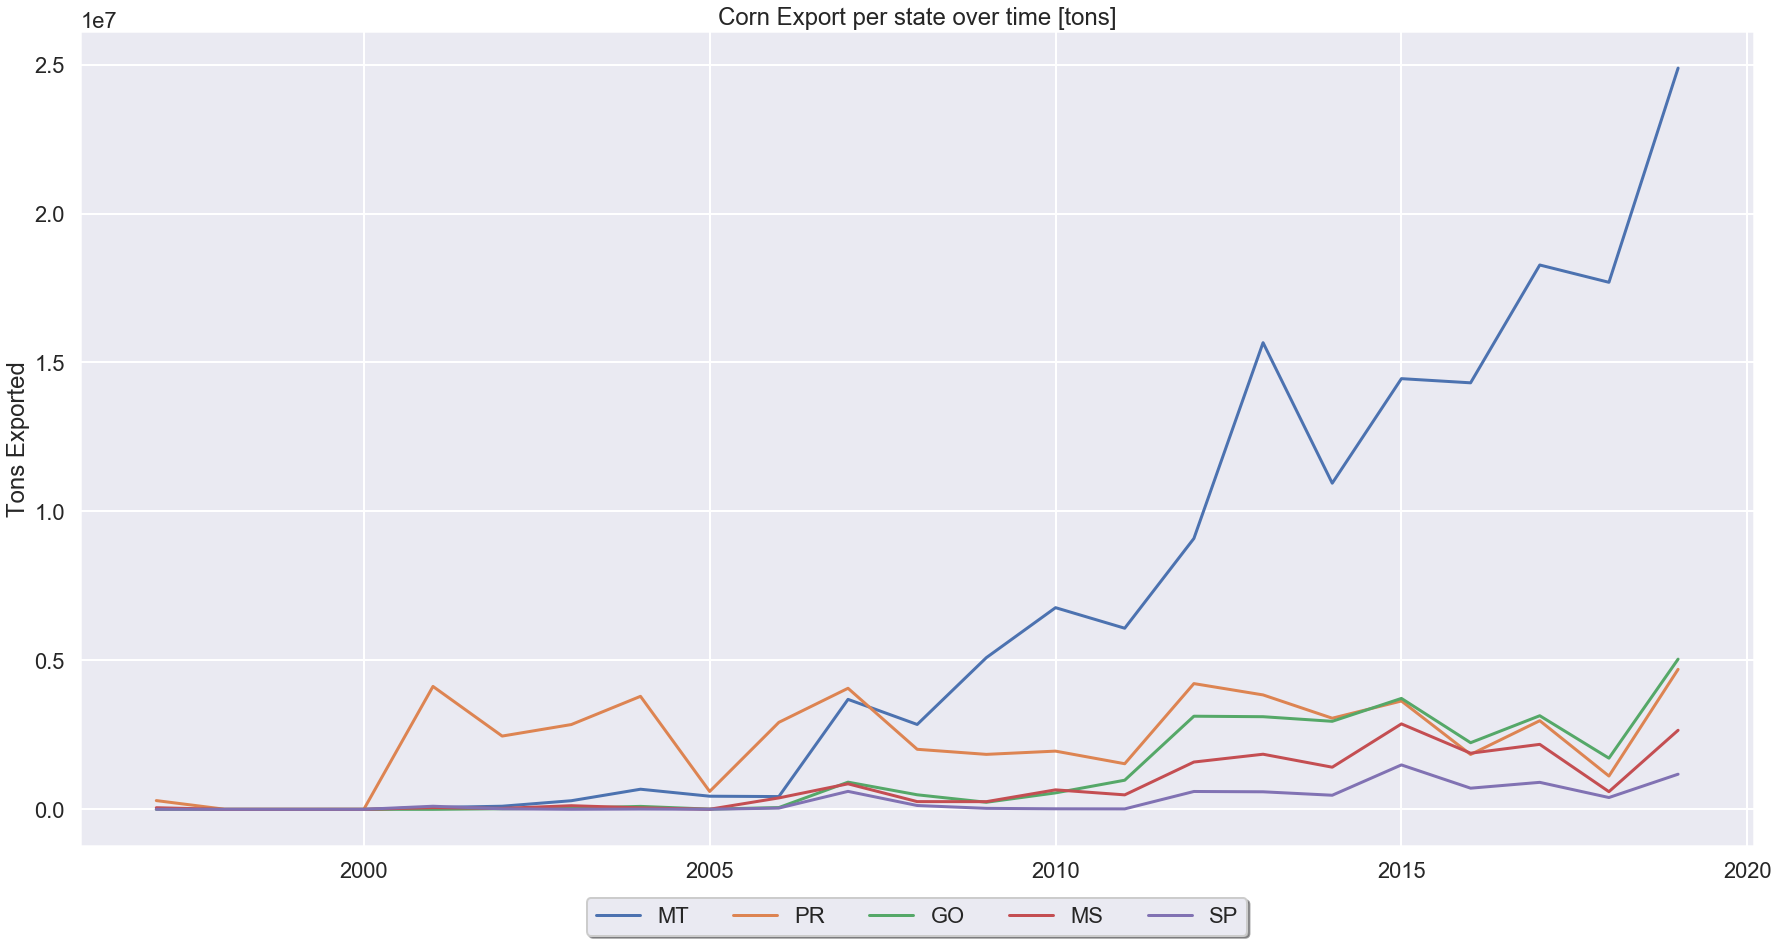

In [948]:
plot_export_state_over_time(state_prod_year_corn, 'Corn')

*   There's a huge positive trend on the Mato Grosso's corn quantity exportation curve. It's already by far the most important state in terms of corn exports looking at the accumulated amount, and already have 5 time more annual production than the second and third most important states (Goias and Paraná);
*   It seems like the corn export market is growing, as all of the five most relevant states for this product show a positive trend on the quantity exported;


*   **Soybean Meal**

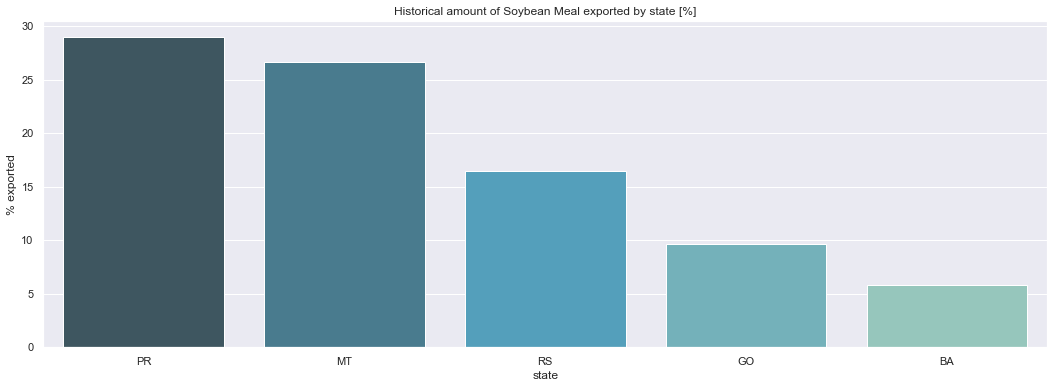

In [949]:
plot_total_export_state(perc_state_prod_soybean_meal, 'Soybean Meal')

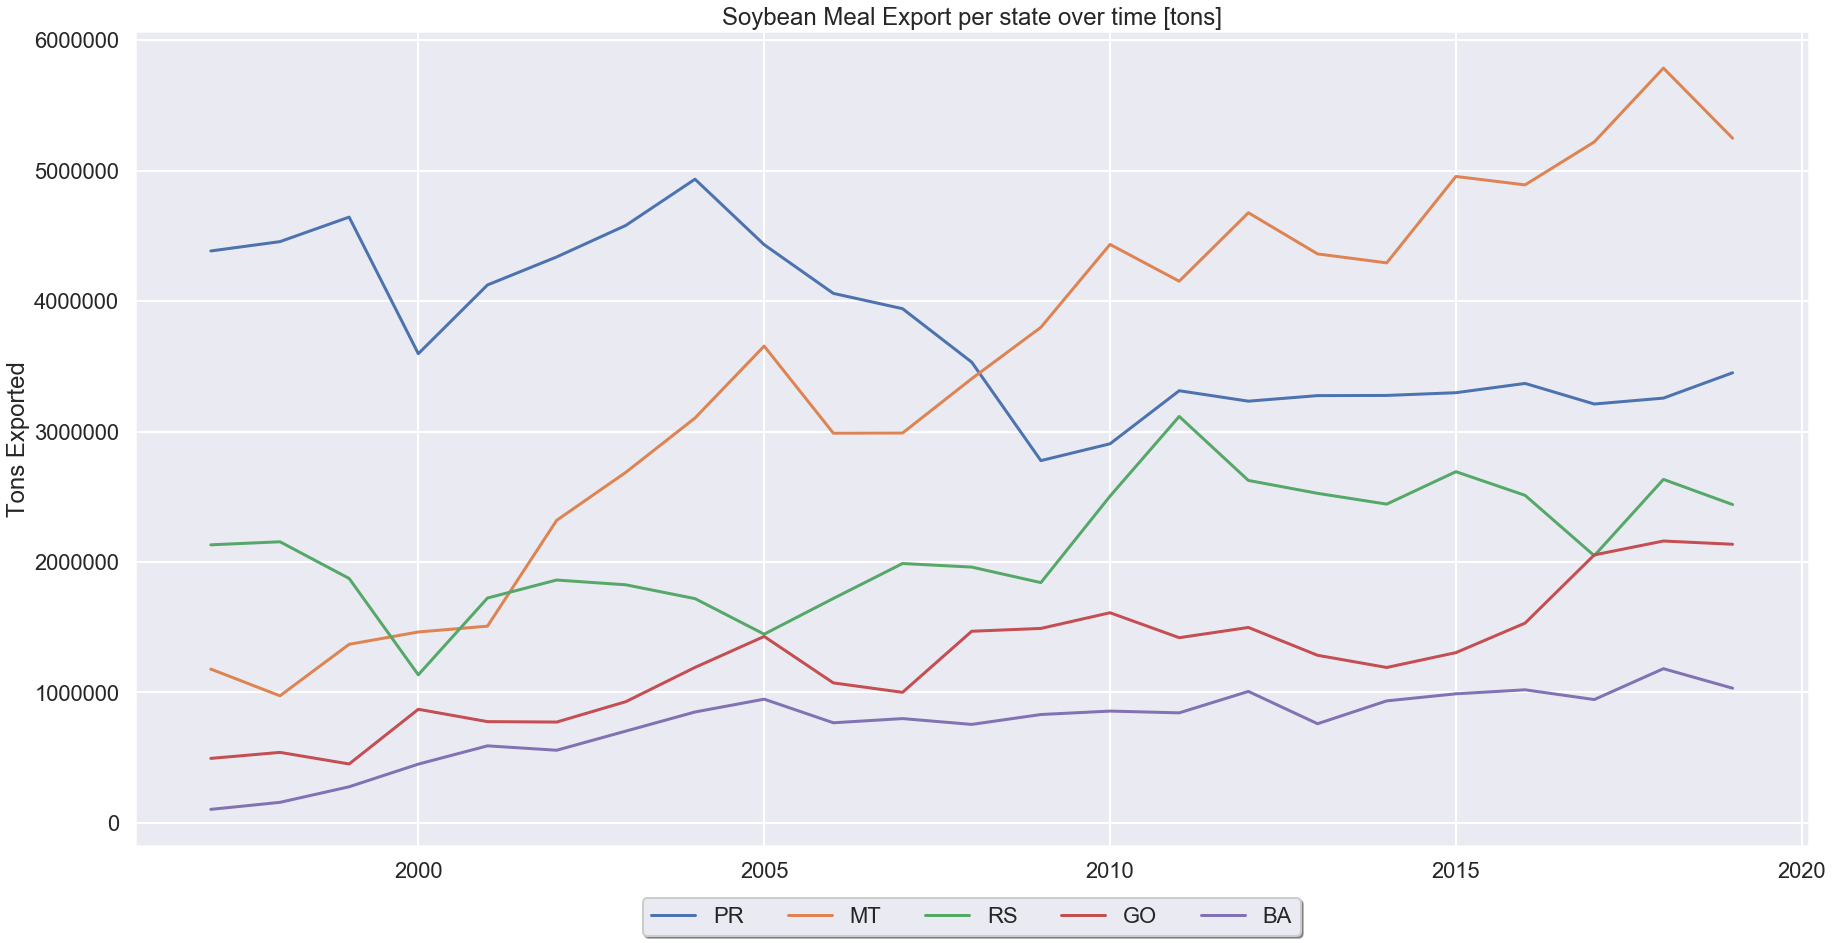

In [950]:
plot_export_state_over_time(state_prod_year_soybean_meal, 'Soybean Meal')

*   Besides the fact of Paraná being the state which have historically exported more soybean mean in Brazil, nowadays Mato Grosso have taken that spot. Export numbers had a huge increase for Mato Grosso since 2000, while Paraná is shrinking since 2004, and now is quite close to the third and fourth places, Rio Grande do Sul and Goias, respectively;

*   **Soybean Oil**

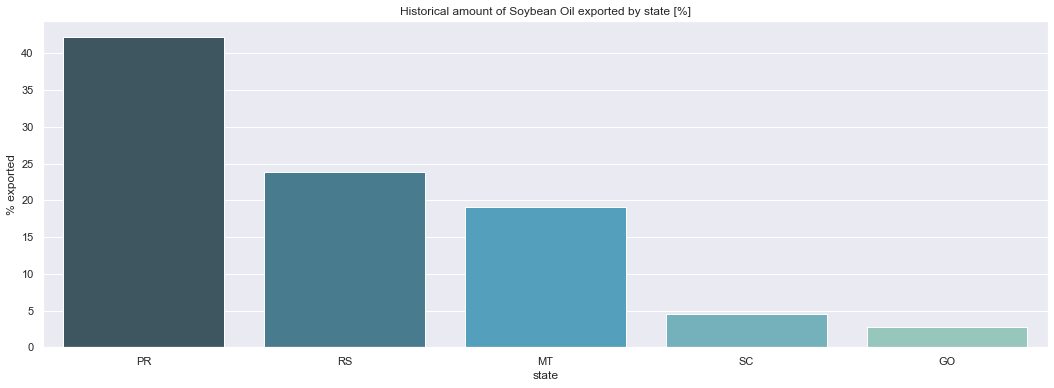

In [951]:
plot_total_export_state(perc_state_prod_soybean_oil, 'Soybean Oil')

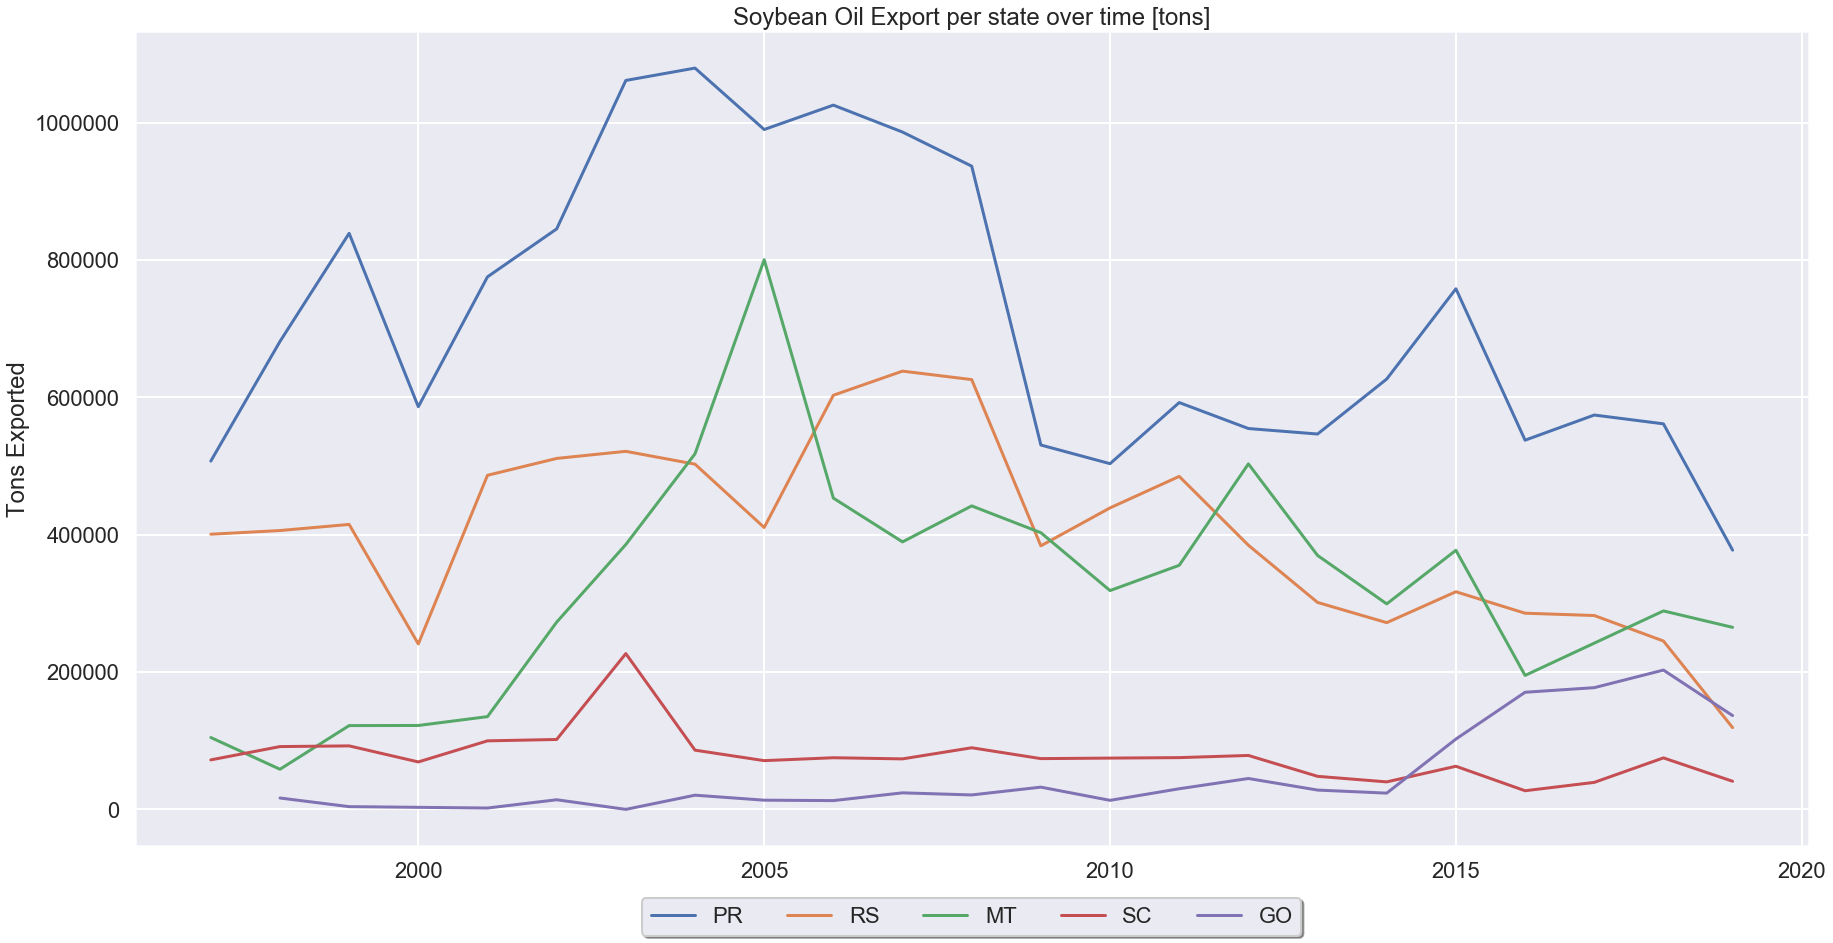

In [952]:
plot_export_state_over_time(state_prod_year_soybean_oil, 'Soybean Oil')

*   Paraná is by far the most relevant brazilian state when we're talking about soybean oil exports;
*   However, it's possible to see that soybean oil exports has showed a negative trend this decade;

*   **Soybeans**

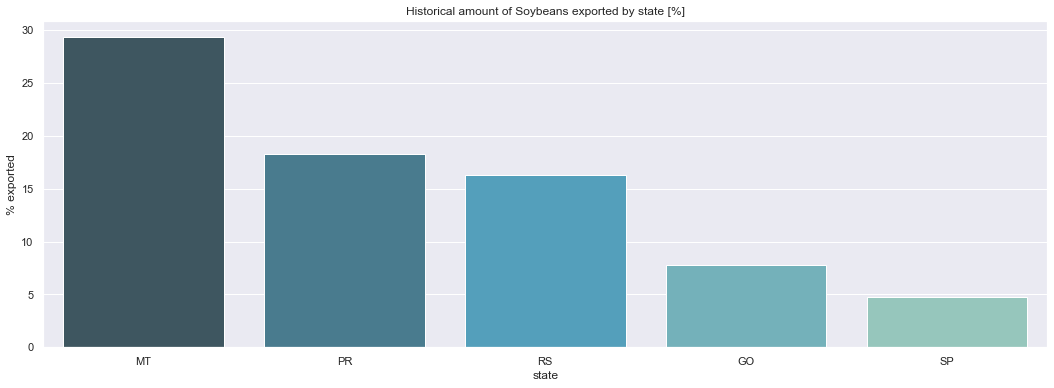

In [953]:
plot_total_export_state(perc_state_prod_soybeans, 'Soybeans')

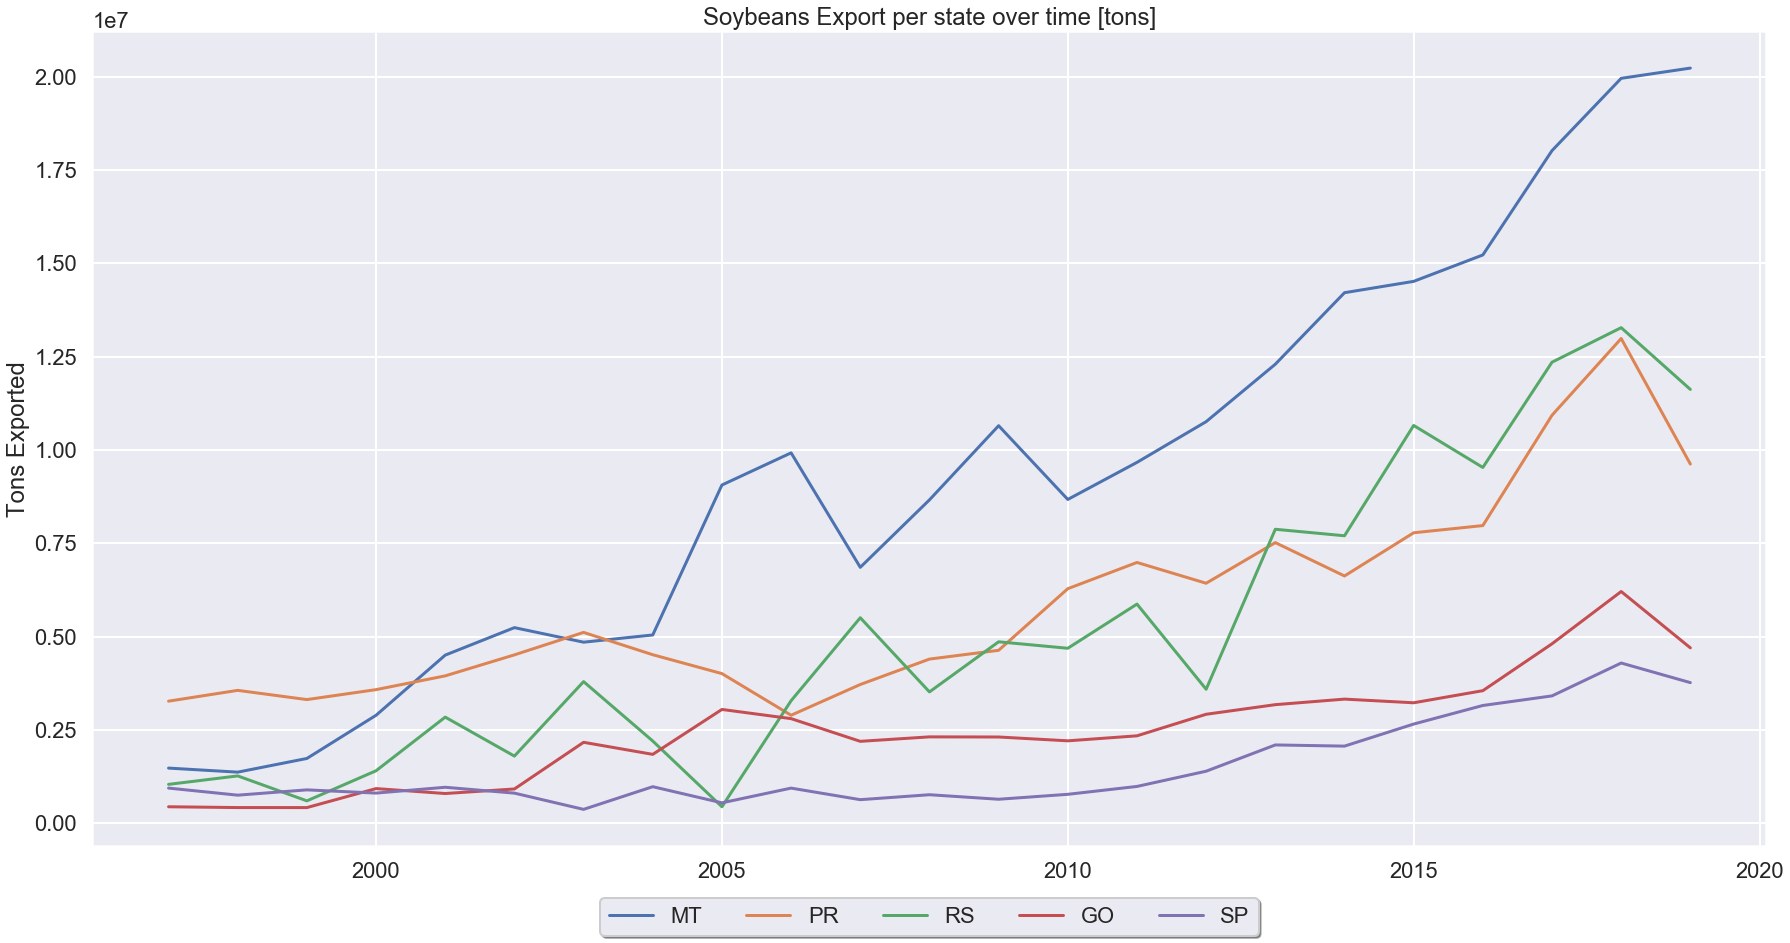

In [954]:
plot_export_state_over_time(state_prod_year_soybeans, 'Soybeans')

*   For Soybeans, Mato Grosso is once again the most relevant, quite confortably;
*   Followed by Paraná and Rio Grande do Sul, that are quite even terms of relevance - Paraná being more relevant historicaly, while Rio Grande do Sul showed better results recently;

*   **Sugar**

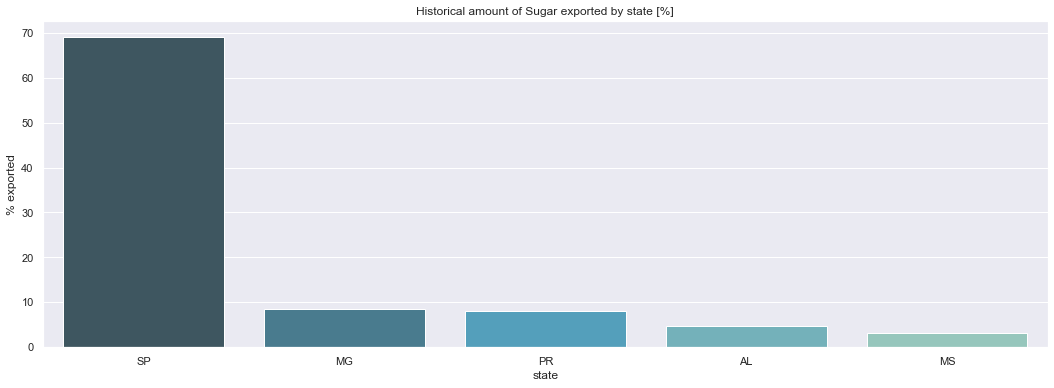

In [955]:
plot_total_export_state(perc_state_prod_sugar, 'Sugar')

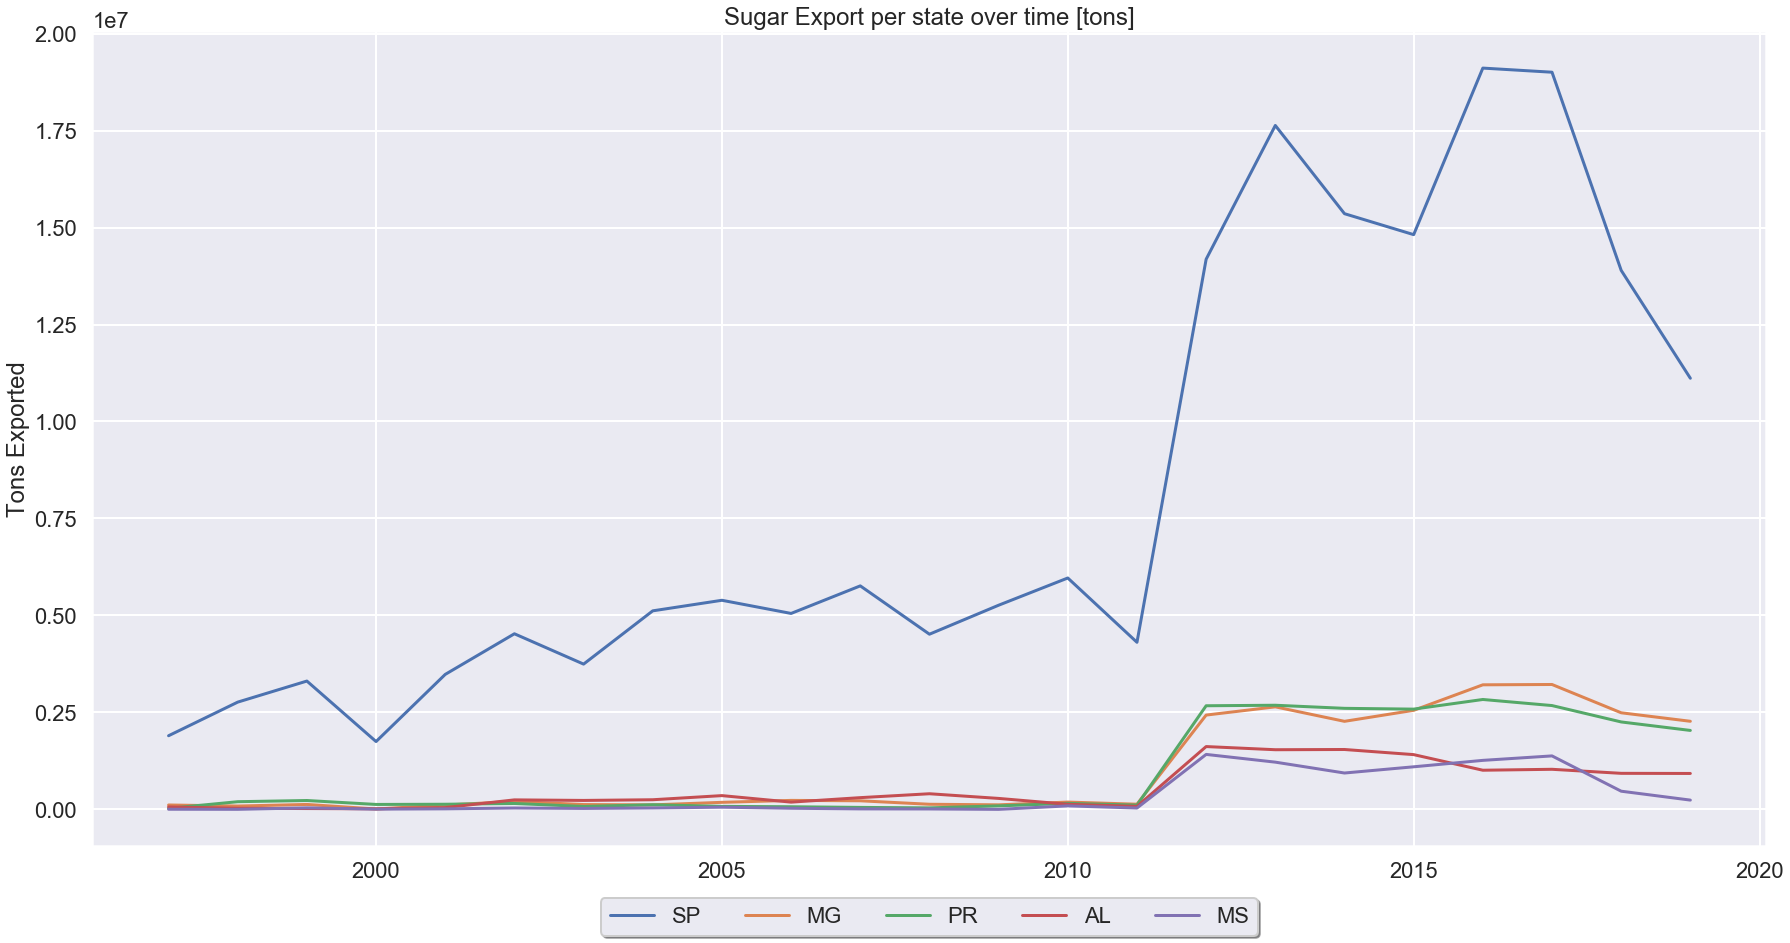

In [956]:
plot_export_state_over_time(state_prod_year_sugar, 'Sugar')

*   São Paulo is by far the most relevant state in terms of sugar exportation;
*   Besides from wheat, this is the biggest relevance difference observed in all the products from this dataset;
*   Following São Paulo, Minas Gerais and Paraná are quite even as second and third most relevant states;
*   It's possible to see that sugar exports had a huge decrease in the last 2 years;


*   **Wheat**

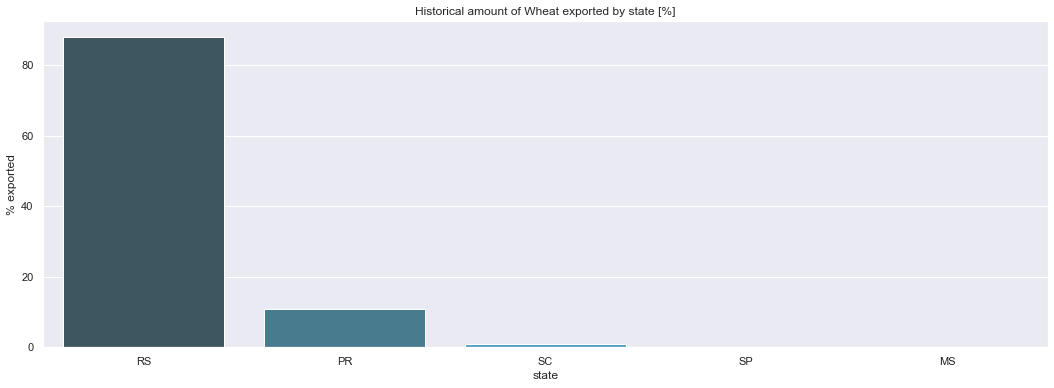

In [957]:
plot_total_export_state(perc_state_prod_wheat, 'Wheat')

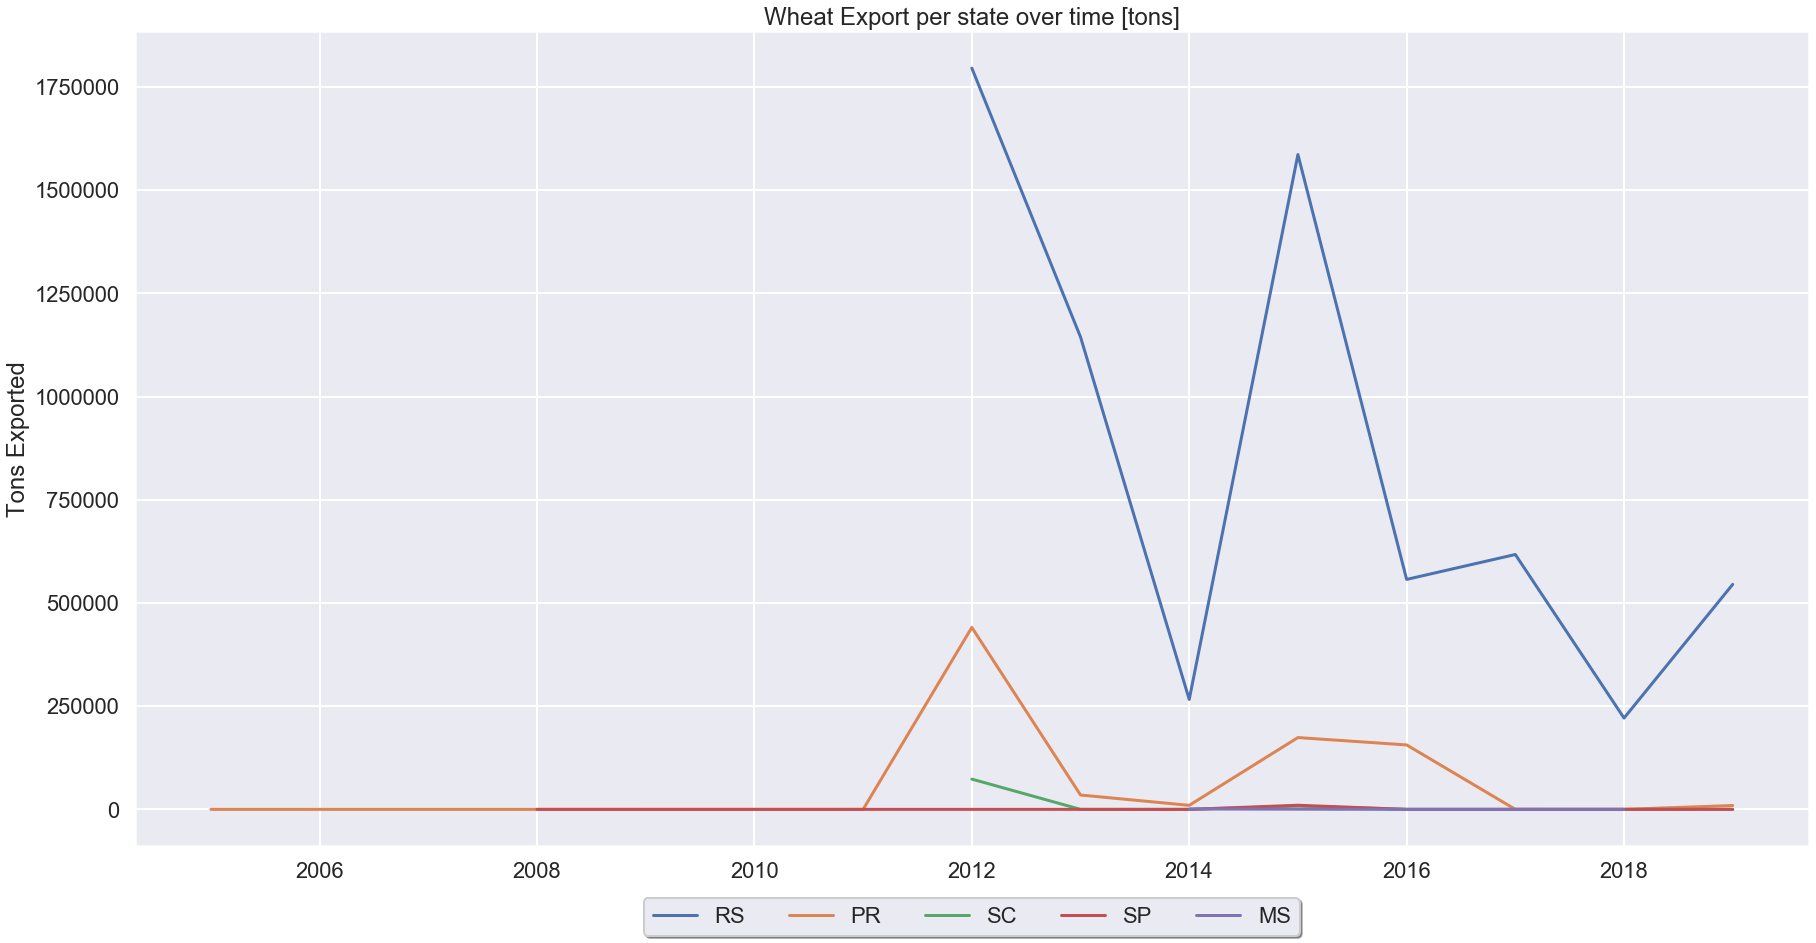

In [958]:
plot_export_state_over_time(state_prod_year_wheat, 'Wheat')

*   Wheat exports is quite a new Market in Brazil, completely dominated by Rio Grande do Sul, which has exported arround 90% of all brazilian wheat ever exported;
*   Exports started in 2011, however most relevant results came in the next year, when Rio Grande do Sul joined the market;
*   The few available data already shows that there's some kind of seasonality on the wheat exports;

### 6) What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [963]:
# Get Data
sns.set()

In [971]:
def get_time_series(prod):
    '''
    INPUT - (prod) product to querry the original dataset
    
    OUTPUT - (ts) time series with total amount exported in tons of the inputed product
    
    '''
    ts = comex_df[(comex_df['product'] == prod)].groupby('year')['tons'].sum()
    
    return ts

In [974]:
def plot_ts(ts, prod):
    '''
    
    '''
    plt.figure(figsize = (18,6));
    plt.title('Brazilian {} export over time [tons]'.format(prod))
    ax = sns.lineplot(x=ts.index, y=ts.values)
    plt.xlabel('Year')
    plt.ylabel('Tons Exported')
    

In [991]:
def plot_covariate(cv_ts, cov):
    '''
    
    '''
    plt.figure(figsize = (18,6));
    plt.title('{} over time'.format(cov))
    ax = sns.lineplot(x=cv_ts.index, y=cv_ts.values)
    plt.xlabel('Year')

In [970]:
# Get time series:

# Soybeans
ts_soybeans = get_time_series('soybeans')

# Soybean Meal
ts_soybean_meal = get_time_series('soybean_meal')

# Corn
ts_corn = get_time_series('corn')

*   **Plot time series**

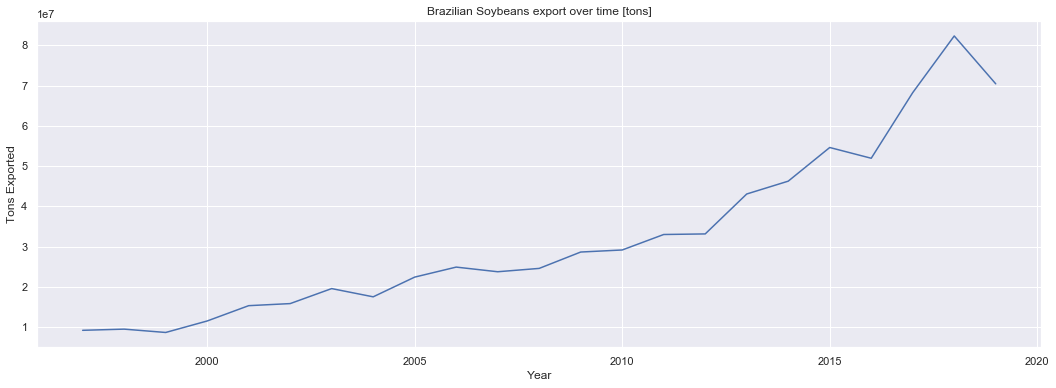

In [976]:
# Soybeans
plot_ts(ts_soybeans, 'Soybeans')

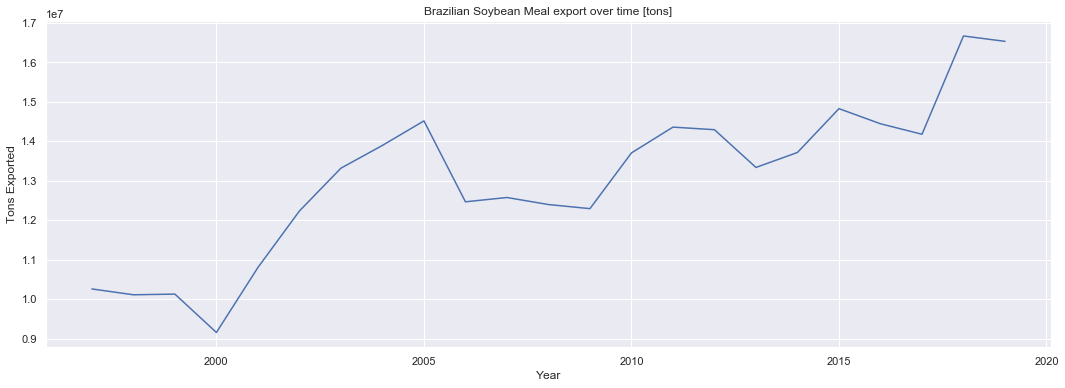

In [977]:
# Soybean Meal
plot_ts(ts_soybean_meal, 'Soybean Meal')

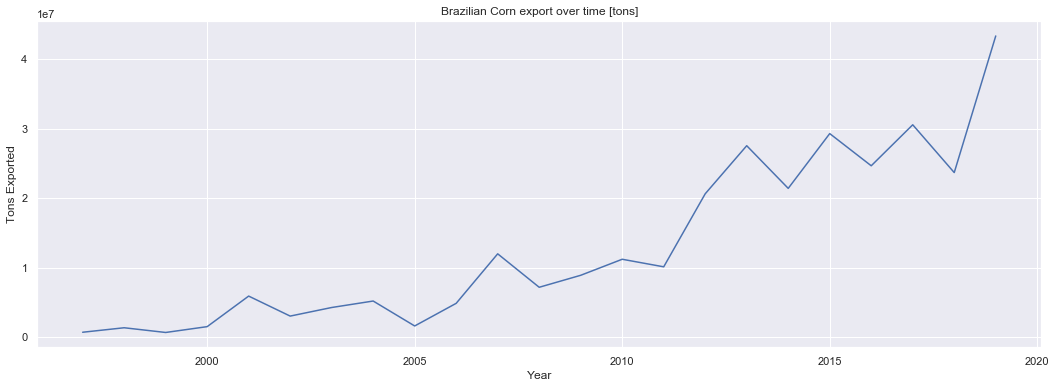

In [978]:
# Corn
plot_ts(ts_corn, 'Corn')

In [994]:
#get covariates data for the same period as exports data
same_period_cov_df = covariates_df[(covariates_df['year'] >= 1997) & (covariates_df['year'] <= 2019)]
same_period_cov_df.index = same_period_cov_df['year']
same_period_cov_df.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
year,,,,,,,,,,,,,
1997,1997,105.761629,93.204180,124.012650,560.722750,106.976296,152.738204,156.728085,345.124057,173.936618,218.683678,180.133771,299.095195
1998,1998,84.160030,80.831375,77.421718,604.459124,109.008846,159.916900,163.780849,318.894628,178.458970,235.084954,178.152299,316.442716
1999,1999,65.928699,71.823936,67.601747,651.002477,109.335873,167.912745,171.478549,333.563781,184.883493,249.425136,177.617842,331.631967
2000,2000,68.993825,70.173520,82.934920,706.337687,116.880048,174.965080,180.223955,348.574151,193.757900,262.894093,182.591142,354.182940
2001,2001,63.605148,71.279115,80.029143,765.670053,117.815088,178.989277,187.252689,360.425672,198.601848,272.095387,183.321506,378.621563


*   **Plot Covariates**

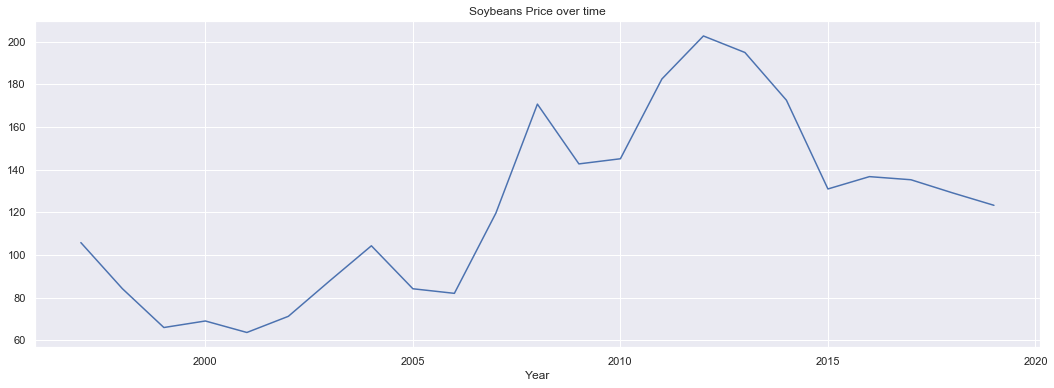

In [996]:
# Soybeans Price
plot_covariate(same_period_cov_df['price_soybeans'], 'Soybeans Price')

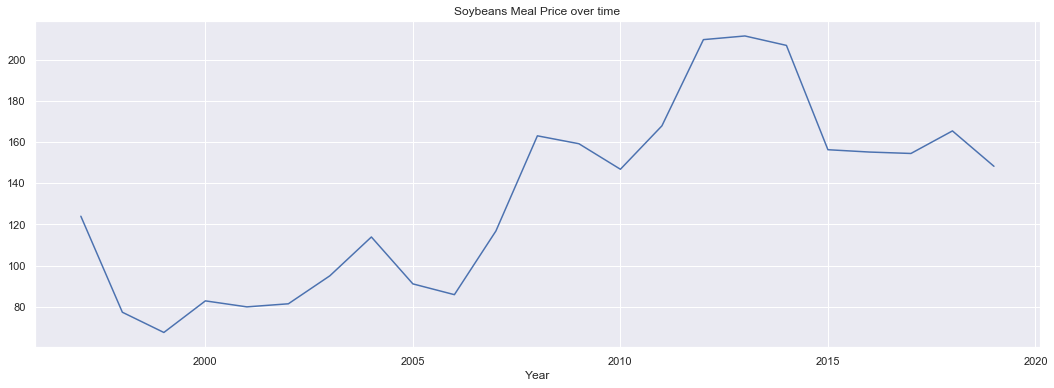

In [997]:
# Soybeans Meal Price
plot_covariate(same_period_cov_df['price_soybean_meal'], 'Soybeans Meal Price')

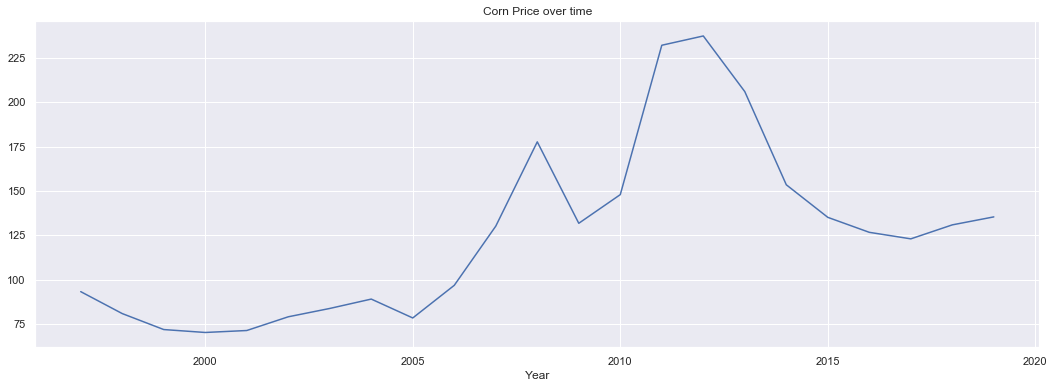

In [998]:
# Soybeans Meal Price
plot_covariate(same_period_cov_df['price_corn'], 'Corn Price')

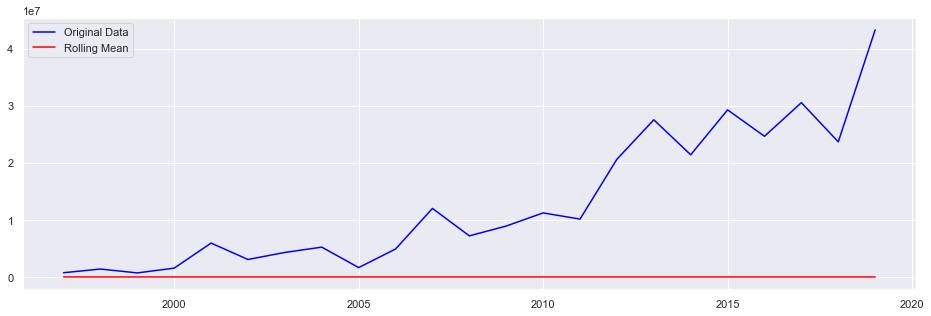

In [999]:
plt.figure(figsize = (16,5));
plt.plot(ts_corn, color='blue', label = 'Original Data')
plt.plot(same_period_cov_df['price_corn'], color = 'red', label = 'Rolling Mean')
#plt.plot(r_std, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')